# Trabajo Práctico 1: Reservas de Hotel - CHP1
## Grupo 05 - Medialunas 🥐

### Integrantes:
| Integrante                              | Número de Padrón |
|----------------------------------------|------------------|
| Iara Elizabeth Jolodovsky      | 109385           |
| Tomas Vainstein Aranguren      | 109043           |
| Martin Abramovich              | 108762           |


In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import numpy as np
import sklearn as sk
import scipy.stats as st
from scipy import stats
from scipy import linalg

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder

hotels = pd.read_csv('./hotels_train.csv')

## Funciones

In [226]:
def calculate_mahalanobis_distance(dataset, col1, col2):
    X = dataset[[f'{col1}', f'{col2}']].copy()
    sample_X = X.sample(frac=0.1)

    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T

    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = linalg.sqrtm(inv_cov)

    Wx = np.matmul(W, X_diff)
    X['mahalanobis'] = [np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])]

    return X

# Análisis Exploratorio y Preprocesamiento de Datos
## Exploración inicial:

In [227]:
hotels.shape

(61913, 31)

In [228]:
hotels.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'id',
       'is_canceled'],
      dtype='object')

In [229]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

### Hotel
Tipo de variable: cualitativa

In [230]:
hotels['hotel'].unique()

array(['City Hotel', 'Resort Hotel'], dtype=object)

Puede tomar los valores **City Hotel** o **Resort Hotel**

In [231]:
cantidad_hotel = hotels.groupby('hotel').size()
porcentajes_hotel = round((cantidad_hotel / cantidad_hotel.sum() * 100), 2)
porcentajes_hotel

hotel
City Hotel      68.05
Resort Hotel    31.95
dtype: float64

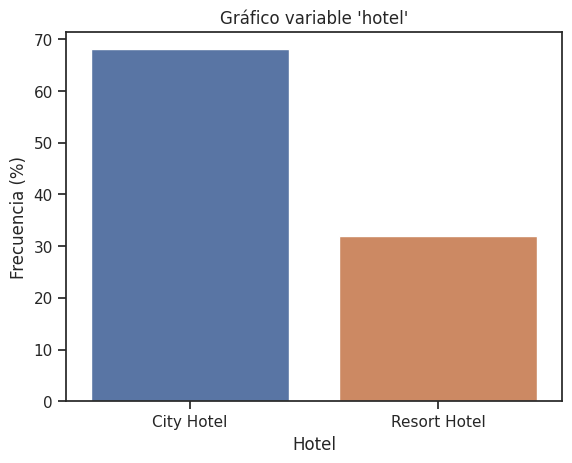

In [232]:
sns.barplot(x=cantidad_hotel.index, y=porcentajes_hotel).set(title="Gráfico variable 'hotel'", ylabel="Frecuencia (%)", xlabel="Hotel")
plt.show()

## Lead time

Tipo de variable: cuantitativa



In [233]:
hotels['lead_time'].describe()

count    61913.000000
mean       112.248187
std        110.717953
min          0.000000
25%         23.000000
50%         78.000000
75%        172.000000
max        629.000000
Name: lead_time, dtype: float64

[Text(0.5, 1.0, "Gráfico de variable 'lead_time'"),
 Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Días')]

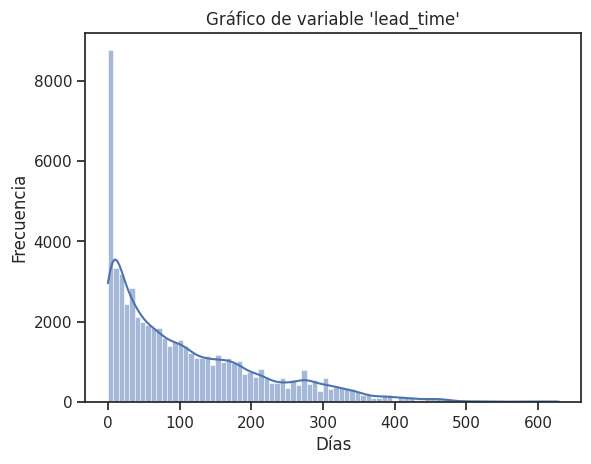

In [234]:
sns.histplot(data=hotels['lead_time'], alpha=0.5, kde=True).set(title="Gráfico de variable 'lead_time'", ylabel="Frecuencia", xlabel="Días")

## Arrival date year

Tipo de variable: cuantitativa



In [235]:
hotels['arrival_date_year'].describe()

count    61913.000000
mean      2016.154749
std          0.708389
min       2015.000000
25%       2016.000000
50%       2016.000000
75%       2017.000000
max       2017.000000
Name: arrival_date_year, dtype: float64

[Text(0.5, 0, 'Año de llegada'),
 Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 1.0, 'Grafico de variable arrival_date_year')]

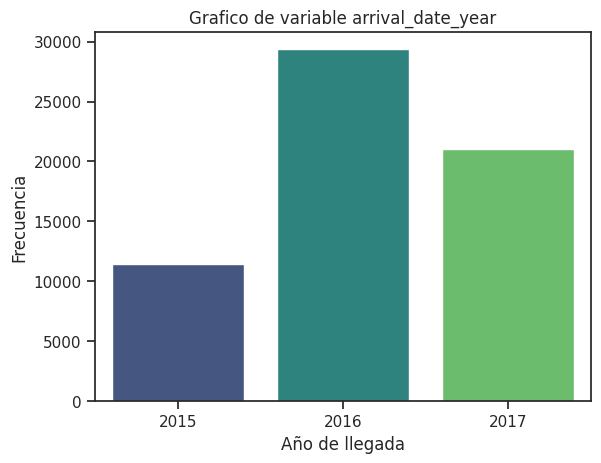

In [236]:
frecuencia_arrival = hotels['arrival_date_year'].value_counts().reset_index()
frecuencia_arrival.columns = ['Año de llegada', 'Frecuencia']

sns.barplot(x='Año de llegada', y='Frecuencia', data=frecuencia_arrival, palette='viridis').set(xlabel ='Año de llegada', ylabel= 'Frecuencia', title= 'Grafico de variable arrival_date_year')

Para el 2016 se realizaron la mayoria de las reservas

## Arrival date month
Tipo de variable: cualitativa

In [237]:
hotels['arrival_date_month'].unique()

array(['September', 'October', 'December', 'March', 'November', 'July',
       'June', 'April', 'August', 'February', 'January', 'May'],
      dtype=object)

Puede tomar todos los meses

In [238]:
cantidad_meses = hotels.groupby('arrival_date_month').size()
porcentajes_meses = round((cantidad_meses / cantidad_meses.sum() * 100), 2)
porcentajes_meses

arrival_date_month
April         9.49
August       11.59
December      5.64
February      6.66
January       4.85
July         10.54
June          9.32
March         7.91
May           9.95
November      5.50
October       9.47
September     9.08
dtype: float64

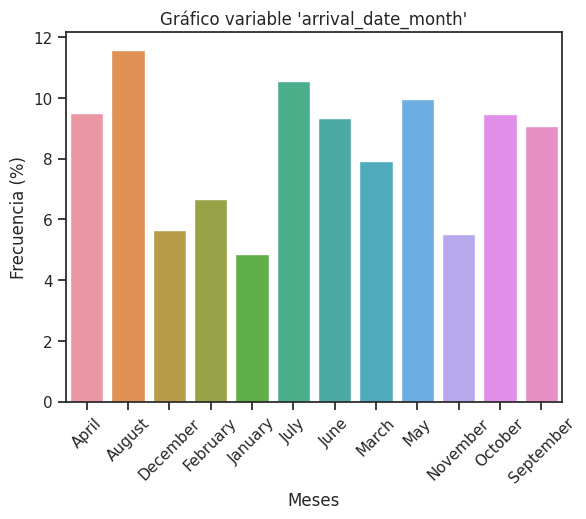

In [239]:
sns.barplot(x=cantidad_meses.index, y=porcentajes_meses).set(title="Gráfico variable 'arrival_date_month'", ylabel="Frecuencia (%)", xlabel="Meses")
plt.xticks(rotation=45)
plt.show()

Observamos que la mayoria de las reservas son para Agosto y Julio.

## Arrival date week number
Tipo de variable: Cuantitativa

In [240]:
hotels['arrival_date_week_number'].describe()

count    61913.00000
mean        27.21808
std         13.52601
min          1.00000
25%         16.00000
50%         28.00000
75%         38.00000
max         53.00000
Name: arrival_date_week_number, dtype: float64

[Text(0.5, 1.0, "Gráfico de variable 'arrival_date_week_number'"),
 Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Semana del año')]

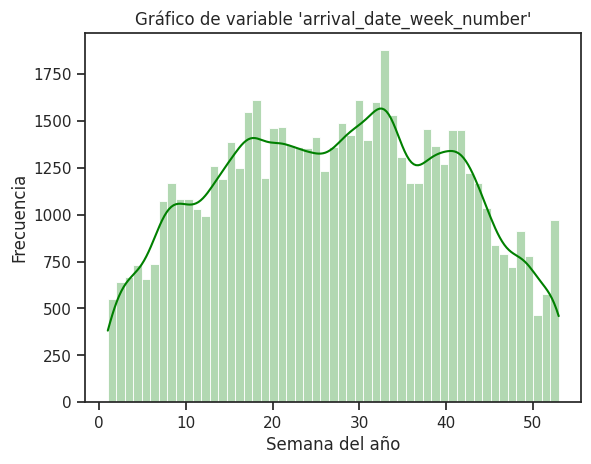

In [241]:
SEMANAS_POR_AÑO = 53
sns.histplot(data=hotels['arrival_date_week_number'], bins=SEMANAS_POR_AÑO, alpha=0.3, color = 'green', kde=True).set(title="Gráfico de variable 'arrival_date_week_number'", ylabel="Frecuencia", xlabel="Semana del año")


Entre la semana 28 y la semana 33 se observa un pico de llegadas

## Arrival date day of month
Tipo de variable: Cuantitativa

In [242]:
hotels['arrival_date_day_of_month'].describe()

count    61913.000000
mean        15.785812
std          8.795489
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: arrival_date_day_of_month, dtype: float64

[Text(0.5, 1.0, "Gráfico de variable 'arrival_date_day_of_month'"),
 Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Dia del mes')]

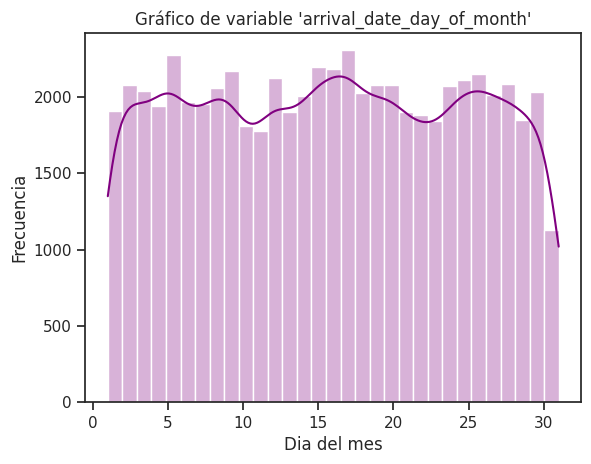

In [243]:
DIAS_MAX_POR_MES = 31
sns.histplot(data=hotels['arrival_date_day_of_month'], bins=DIAS_MAX_POR_MES, alpha=0.3, color = 'purple', kde=True).set(title="Gráfico de variable 'arrival_date_day_of_month'", ylabel="Frecuencia", xlabel="Dia del mes")

En el gráfico no se observan grandes picos o descensos

## Stays in weekend nights
Tipo de variable: Cuantitativa

In [244]:
hotels['stays_in_weekend_nights'].describe()

count    61913.000000
mean         0.924135
std          0.993101
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: stays_in_weekend_nights, dtype: float64

[Text(0.5, 1.0, "Gráfico de variable 'stays_in_weekend_nights'"),
 Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Noches fin de semana')]

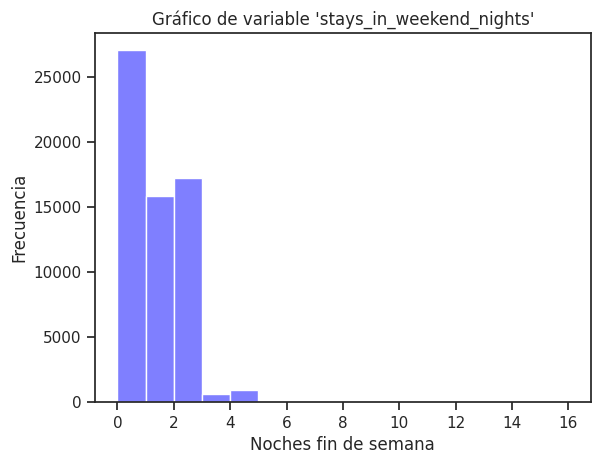

In [245]:
sns.histplot(data=hotels['stays_in_weekend_nights'], bins=16, alpha=0.5, color = 'blue').set(title="Gráfico de variable 'stays_in_weekend_nights'", ylabel="Frecuencia", xlabel="Noches fin de semana")

La mayoria se queda entre 0 y 1 noches de fin de semana

## Stays in week nights
Tipo de variable: Cuantitativa

In [246]:
hotels['stays_in_week_nights'].describe()

count    61913.000000
mean         2.510054
std          1.884926
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: stays_in_week_nights, dtype: float64

[Text(0.5, 1.0, "Gráfico de variable 'stays_in_week_nights'"),
 Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Noches de semana')]

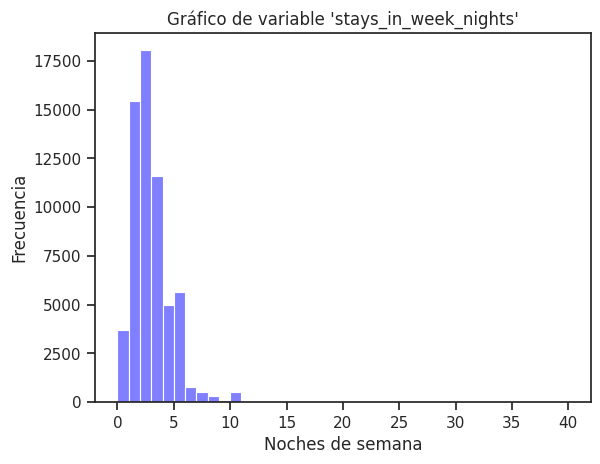

In [247]:
sns.histplot(data=hotels['stays_in_week_nights'], bins=40, alpha=0.5, color = 'blue').set(title="Gráfico de variable 'stays_in_week_nights'", ylabel="Frecuencia", xlabel="Noches de semana")

La mayoria reserva entre 1 y 4 noches aproximadamente de semana

## Adults
Tipo de variable: Cuantitativa

In [248]:
hotels['adults'].describe()

count    61913.000000
mean         1.862791
std          0.589066
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: adults, dtype: float64

[Text(0.5, 1.0, "Grafico variable 'adults'"),
 Text(0.5, 0, 'Adultos'),
 Text(0, 0.5, 'Frecuencia')]

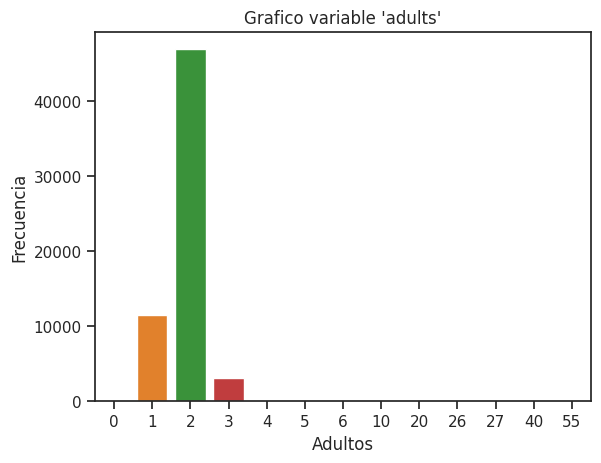

In [249]:
frecuencia_adultos = hotels['adults'].value_counts().reset_index()
frecuencia_adultos.columns = ['Número de Adultos', 'Frecuencia']

sns.barplot(x='Número de Adultos', y='Frecuencia', data=frecuencia_adultos, palette='tab10').set(title="Grafico variable 'adults'", xlabel='Adultos', ylabel='Frecuencia')

En la mayoria de las reservas hay 2 adultos

## Children
Tipo de variable: Cuantitativa

In [250]:
hotels['children'].describe()

count    61909.000000
mean         0.104896
std          0.402847
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: children, dtype: float64

[Text(0.5, 1.0, "Grafico variable 'children'"),
 Text(0.5, 0, 'Chicos'),
 Text(0, 0.5, 'Frecuencia')]

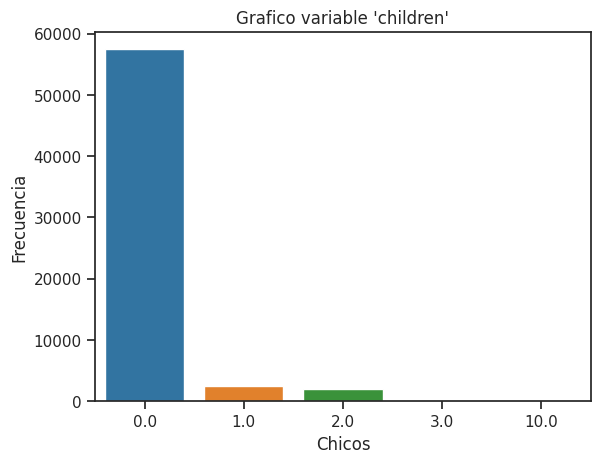

In [251]:
frecuencia_chicos = hotels['children'].value_counts().reset_index()
frecuencia_chicos.columns = ['Número de Chicos', 'Frecuencia']

sns.barplot(x='Número de Chicos', y='Frecuencia', data=frecuencia_chicos, palette='tab10').set(title="Grafico variable 'children'", xlabel='Chicos', ylabel='Frecuencia')

La mayoria de las reservas no tienen chicos

## Babies
Tipo de variable: Cuantitativa

In [252]:
hotels['babies'].describe()

count    61913.000000
mean         0.007155
std          0.092158
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: babies, dtype: float64

[Text(0.5, 1.0, "Grafico variable 'babies'"),
 Text(0.5, 0, 'Chicos'),
 Text(0, 0.5, 'Frecuencia')]

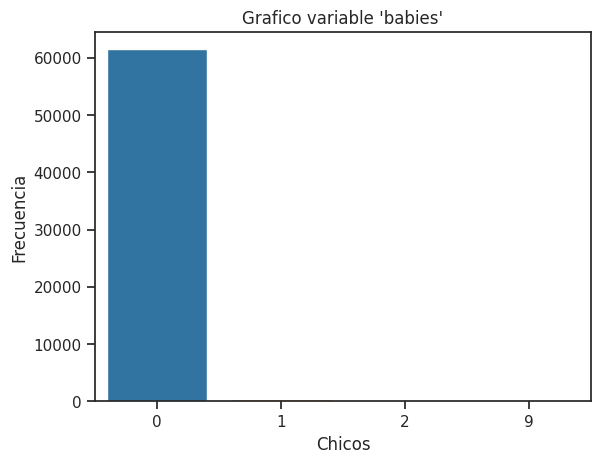

In [253]:
frecuencia_bebes = hotels['babies'].value_counts().reset_index()
frecuencia_bebes.columns = ['Número de bebes', 'Frecuencia']

sns.barplot(x='Número de bebes', y='Frecuencia', data=frecuencia_bebes, palette='tab10').set(title="Grafico variable 'babies'", xlabel='Chicos', ylabel='Frecuencia')

La mayoria de las reservas son sin bebes

## Meal
Tipo de variable: Cualitativa

In [254]:
hotels['meal'].unique()

array(['BB', 'HB', 'SC', 'Undefined', 'FB'], dtype=object)

Puede tomar los valores **BB**, **HB**, **SC**, **Undifined** o **FB**

In [255]:
cantidad_meal = hotels.groupby('meal').size()
porcentajes_meal = round((cantidad_meal / cantidad_meal.sum() * 100), 2)
porcentajes_meal

meal
BB           77.26
FB            0.77
HB           12.04
SC            8.97
Undefined     0.95
dtype: float64

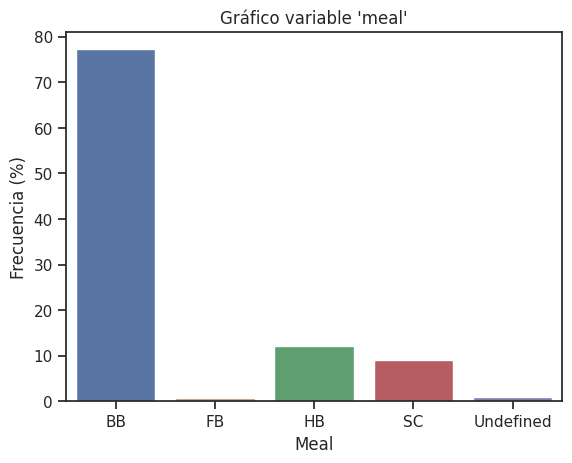

In [256]:
sns.barplot(x=cantidad_meal.index, y=porcentajes_meal).set(title="Gráfico variable 'meal'", ylabel="Frecuencia (%)", xlabel="Meal")
plt.show()

La mayoria de las reservas tienen el paquete BB de meal (Bed and Breakfast).

## Country
Tipo de variable: Cualitativa

In [257]:
hotels['country'].unique()

array(['USA', 'PRT', 'CHE', 'FRA', 'AGO', 'GBR', 'DEU', 'ESP', 'ROU',
       'SWE', 'IRL', 'CN', 'ITA', 'NLD', 'NOR', 'MAR', 'IND', 'BEL',
       'ISR', 'KOR', 'TUN', 'JPN', 'FIN', 'TUR', 'CHN', 'AUT', 'ZAF',
       'LUX', 'BRA', 'POL', 'DNK', 'IRN', 'RUS', 'VEN', 'SEN', 'AUS',
       'MLT', 'BGR', 'THA', 'GEO', 'SRB', 'PHL', 'ARG', 'LVA', 'LTU',
       'ARE', nan, 'VNM', 'MOZ', 'MEX', 'HUN', 'DZA', 'GAB', 'UKR', 'SVN',
       'HRV', 'SVK', 'CHL', 'BLR', 'CPV', 'CRI', 'EST', 'TWN', 'ALB',
       'SGP', 'PRI', 'IDN', 'DOM', 'MUS', 'OMN', 'EGY', 'SAU', 'NZL',
       'FRO', 'CYP', 'PER', 'CZE', 'GRC', 'ARM', 'COL', 'PAK', 'MDG',
       'HKG', 'MYS', 'MKD', 'ISL', 'BIH', 'NGA', 'AZE', 'MAC', 'JEY',
       'SUR', 'KWT', 'BGD', 'IRQ', 'MDV', 'GGY', 'VGB', 'ECU', 'URY',
       'ETH', 'LBN', 'BOL', 'QAT', 'JOR', 'COM', 'GNB', 'MYT', 'UGA',
       'BEN', 'GIB', 'KAZ', 'TZA', 'LBY', 'SYC', 'PRY', 'MNE', 'ZWE',
       'CAF', 'ATA', 'MWI', 'JAM', 'AND', 'LIE', 'FJI', 'TJK', 'LKA',
       'HND', 'P

In [258]:
cantidad_country = hotels.groupby('country').size().sort_values(ascending=False)
porcentajes_country = round((cantidad_country / cantidad_country.sum() * 100), 2).sort_values(ascending = False)
porcentajes_country

country
PRT    45.31
GBR     9.29
FRA     7.80
ESP     6.82
DEU     5.37
       ...  
PRY     0.00
GGY     0.00
GTM     0.00
MYT     0.00
FJI     0.00
Length: 149, dtype: float64

Mostraremos la distribucion de los 10 paises mas registrados, ya que sino el grafico se vuelve dificil de interpretar:

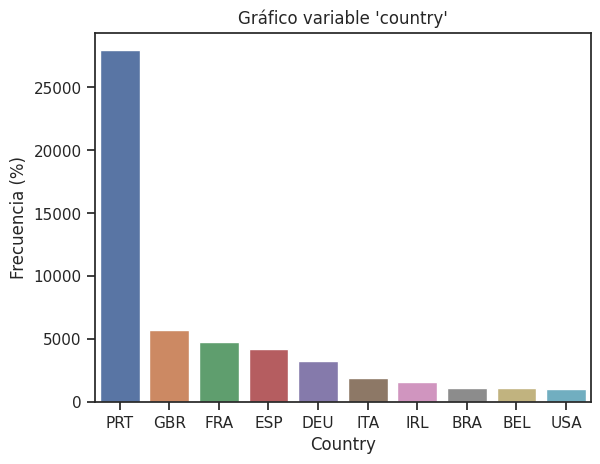

In [259]:
top_10_country = cantidad_country.head(10);
sns.barplot(x=top_10_country.index, y=top_10_country).set(title="Gráfico variable 'country'", ylabel="Frecuencia (%)", xlabel="Country")
plt.show()

La mayoria de las reservas son de Portugal.

## Market Segment
Tipo de variable: Cualitativa

In [260]:
hotels['market_segment'].unique()

array(['Online TA', 'Groups', 'Offline TA/TO', 'Direct', 'Complementary',
       'Corporate', 'Aviation', 'Undefined'], dtype=object)

TA singifica Travel Agents y TO Tour Operators

In [261]:
cantidad_market = hotels.groupby('market_segment').size().sort_values(ascending=False)
porcentajes_market = round((cantidad_market / cantidad_market.sum() * 100), 2).sort_values(ascending=False)
porcentajes_market

market_segment
Online TA        47.27
Offline TA/TO    20.00
Groups           18.65
Direct            9.30
Corporate         4.01
Complementary     0.58
Aviation          0.18
Undefined         0.00
dtype: float64

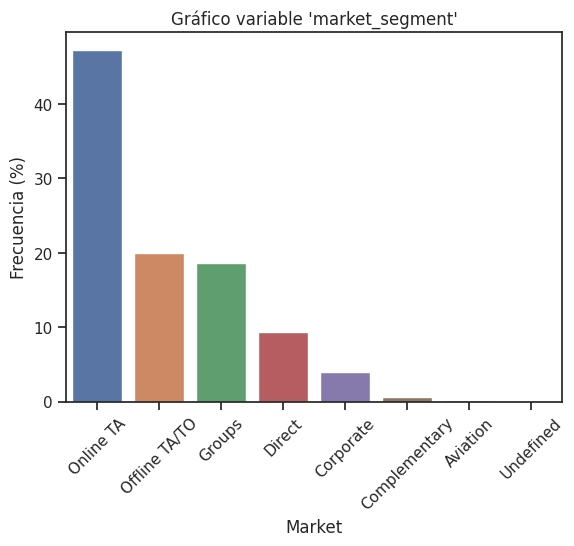

In [262]:
sns.barplot(x=cantidad_market.index, y=porcentajes_market).set(title="Gráfico variable 'market_segment'", ylabel="Frecuencia (%)", xlabel="Market")
plt.xticks(rotation=45)
plt.show()

La mayoria de las reservas son Online Travel Agents

## Distribution Channel
Tipo de variable: Cualitativa

In [263]:
hotels['distribution_channel'].unique()

array(['TA/TO', 'Direct', 'Corporate', 'GDS', 'Undefined'], dtype=object)

Puede tomar los valores **TA/TO**, **Direct**, **Corporate**, **GDS** o **Undifined**

In [264]:
cantidad_distribution = hotels.groupby('distribution_channel').size().sort_values(ascending=False)
porcentajes_distribution = round((cantidad_distribution / cantidad_distribution.sum() * 100), 2).sort_values(ascending=False)
porcentajes_distribution

distribution_channel
TA/TO        83.74
Direct       10.98
Corporate     5.12
GDS           0.14
Undefined     0.01
dtype: float64

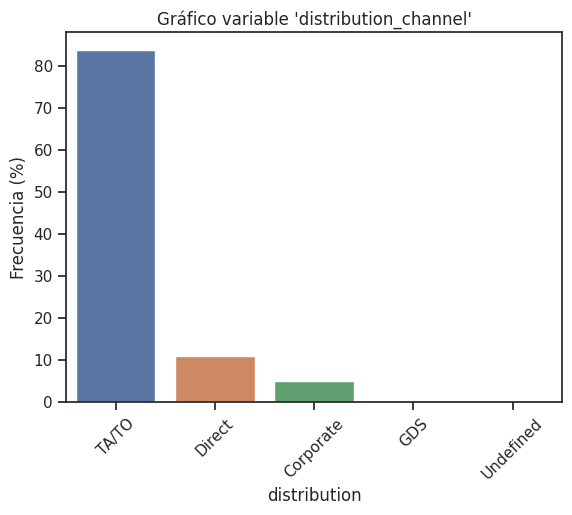

In [265]:
sns.barplot(x=cantidad_distribution.index, y=porcentajes_distribution).set(title="Gráfico variable 'distribution_channel'", ylabel="Frecuencia (%)", xlabel="distribution")
plt.xticks(rotation=45)
plt.show()

La mayoria de las reservan son a traves de TA/TO

## Is Repeated Guest
Tipo de variable: Cualitativa

In [266]:
hotels['is_repeated_guest'].unique()

array([0, 1])

Puede tomar los valores 1 o 0 que representan **TRUE** o **FALSE**

In [267]:
cantidad_repeated = hotels.groupby('is_repeated_guest').size().sort_values(ascending=False)
porcentajes_repeated = round((cantidad_repeated / cantidad_repeated.sum() * 100), 2).sort_values(ascending=False)
porcentajes_repeated

is_repeated_guest
0    97.2
1     2.8
dtype: float64

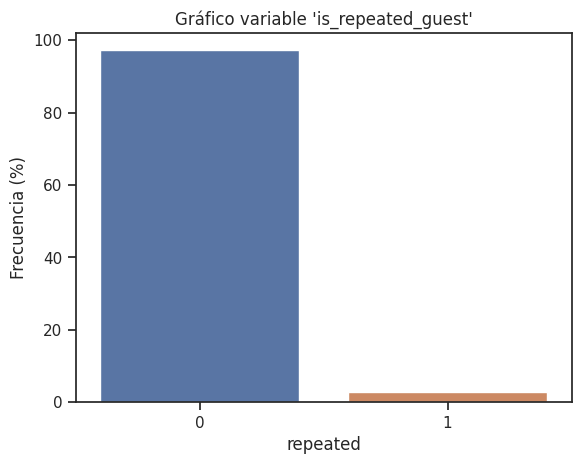

In [268]:
sns.barplot(x=cantidad_repeated.index, y=porcentajes_repeated).set(title="Gráfico variable 'is_repeated_guest'", ylabel="Frecuencia (%)", xlabel="repeated")
plt.show()

La mayoria de las reservas no son huespedes repetidos

## Previous Cancellations
Tipo de variable: Cuantitativa

In [269]:
hotels['previous_cancellations'].describe()

count    61913.000000
mean         0.114790
std          0.993723
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.000000
Name: previous_cancellations, dtype: float64

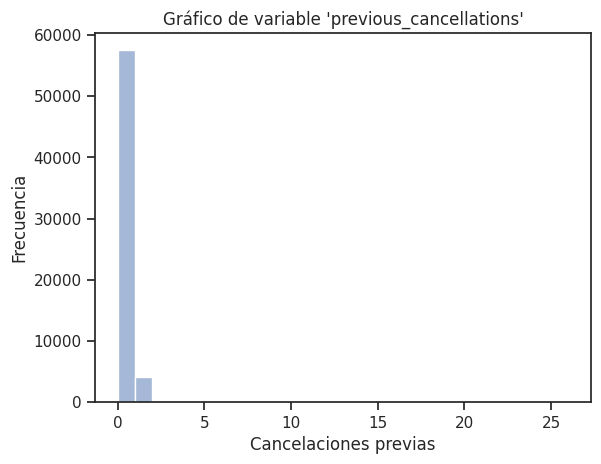

In [270]:
sns.histplot(data=hotels['previous_cancellations'], bins=26, alpha=0.5).set(title="Gráfico de variable 'previous_cancellations'", ylabel="Frecuencia", xlabel="Cancelaciones previas")
plt.show()

La mayoria de las reservas no registran haber cancelado una anteriormente

## Previous Bookings Not Canceled
Tipo de variable: Cuantitativa

In [271]:
hotels['previous_bookings_not_canceled'].describe()

count    61913.000000
mean         0.115420
std          1.396359
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         70.000000
Name: previous_bookings_not_canceled, dtype: float64

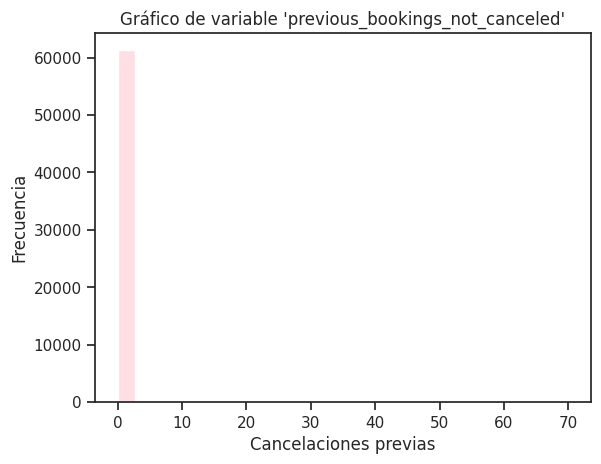

In [272]:
sns.histplot(data=hotels['previous_bookings_not_canceled'], bins=26, alpha=0.5, color='pink').set(title="Gráfico de variable 'previous_bookings_not_canceled'", ylabel="Frecuencia", xlabel="Cancelaciones previas")
plt.show()

La mayoria no canceló sus reservas previas

## Reserved Room Type
Tipo de dato: Cualitativa

In [273]:
hotels['reserved_room_type'].unique()

array(['D', 'A', 'F', 'E', 'G', 'B', 'C', 'H', 'P', 'L'], dtype=object)

In [274]:
cantidad_room_type = hotels.groupby('reserved_room_type').size().sort_values(ascending=False)
porcentajes_room_type = round((cantidad_room_type / cantidad_room_type.sum() * 100), 2).sort_values(ascending=False)
porcentajes_room_type

reserved_room_type
A    72.90
D    15.48
E     5.25
F     2.34
G     1.76
B     0.94
C     0.78
H     0.54
P     0.01
L     0.00
dtype: float64

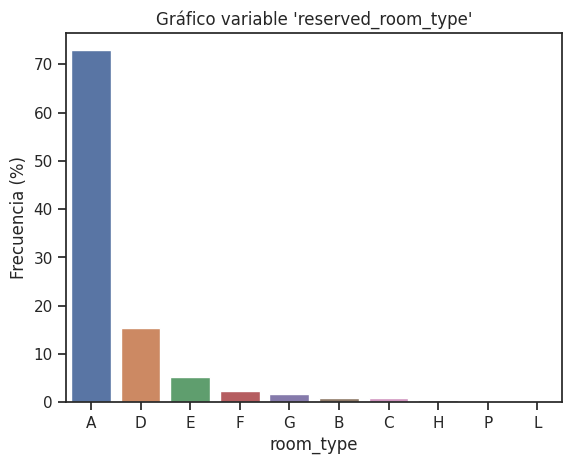

In [275]:
sns.barplot(x=cantidad_room_type.index, y=porcentajes_room_type).set(title="Gráfico variable 'reserved_room_type'", ylabel="Frecuencia (%)", xlabel="room_type")
plt.show()

El tipo de cuarto A es el mas reservado

## Assigned Room Type

Tipo de variable: cualitativa

In [276]:
hotels['assigned_room_type'].unique()

array(['D', 'A', 'F', 'E', 'H', 'C', 'G', 'B', 'I', 'K', 'P', 'L'],
      dtype=object)

In [277]:
cantidad_assigned_room_type = hotels.groupby('assigned_room_type').size().sort_values(ascending=False)
porcentajes_assigned_room_type = round((cantidad_assigned_room_type / cantidad_assigned_room_type.sum() * 100), 2).sort_values(ascending = False)
porcentajes_assigned_room_type

assigned_room_type
A    64.62
D    19.69
E     6.10
F     2.94
G     2.06
C     1.82
B     1.71
H     0.62
I     0.23
K     0.19
P     0.01
L     0.00
dtype: float64

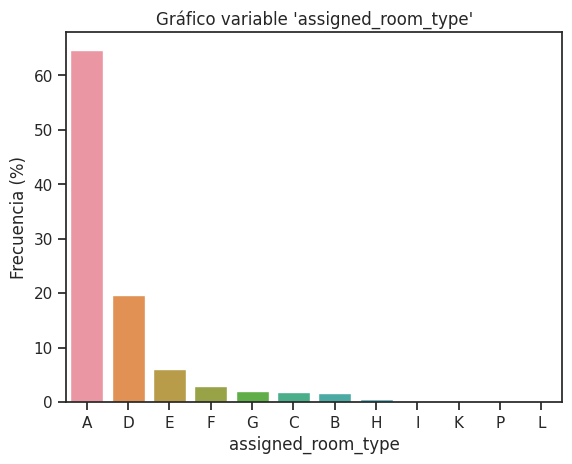

In [278]:
sns.barplot(x=cantidad_assigned_room_type.index, y=porcentajes_assigned_room_type).set(title="Gráfico variable 'assigned_room_type'", ylabel="Frecuencia (%)", xlabel="assigned_room_type")
plt.show()

Se puede observar como las habitaciones A, D, E, F y G encabezan la lista de habitaciones más asignadas, mientras que la P y la L se encuentran entre las menos asignadas.

## Booking changes
Tipo de variable: cuantitativa

In [279]:
hotels['booking_changes'].describe()

count    61913.000000
mean         0.195952
std          0.610519
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         17.000000
Name: booking_changes, dtype: float64

[Text(0.5, 1.0, "Gráfico de variable 'booking_changes'"),
 Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Cambios de reserva')]

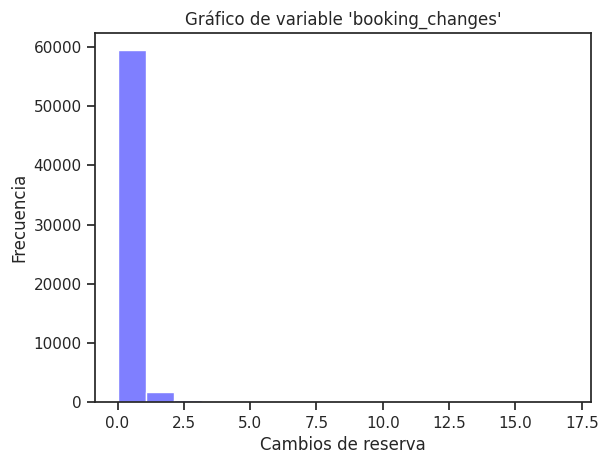

In [280]:
sns.histplot(data=hotels['booking_changes'], bins=16, alpha=0.5, color = 'blue').set(title="Gráfico de variable 'booking_changes'", ylabel="Frecuencia", xlabel="Cambios de reserva")

La mayoría hace entre 0 y 1 cambios en su reserva

## Desposit Type
Tipo de variable: cualitativa

In [281]:
hotels['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [282]:
cantidad_deposit_type = hotels.groupby('deposit_type').size().sort_values(ascending=False)
porcentajes_deposit_type = round((cantidad_deposit_type / cantidad_deposit_type.sum() * 100), 2).sort_values(ascending = False)
porcentajes_deposit_type

deposit_type
No Deposit    83.48
Non Refund    16.39
Refundable     0.13
dtype: float64

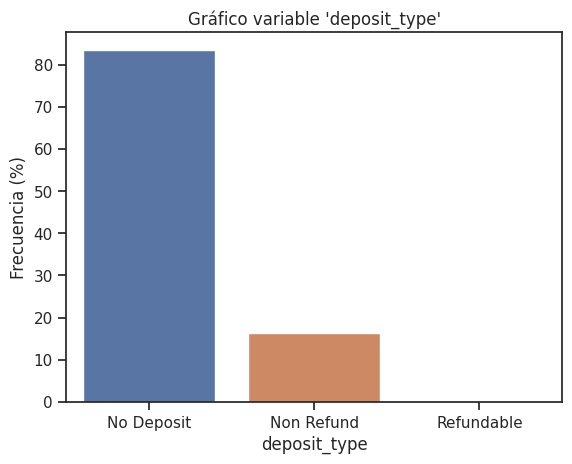

In [283]:
sns.barplot(x=cantidad_deposit_type.index, y=porcentajes_deposit_type).set(title="Gráfico variable 'deposit_type'", ylabel="Frecuencia (%)", xlabel="deposit_type")
plt.show()

La mayoría no hace una reserva con depósito y si lo hacen es del tipo no reembolsable.

## Agent
Tipo de variable: cualitativa

In [284]:
hotels['agent'].unique()

array([  9.,  nan, 154.,  20., 314., 240.,  58., 250.,  86., 229.,   1.,
        33.,   8.,   3., 236., 177.,  38.,  39., 170., 410.,  85.,  26.,
        96.,  14., 134.,  56., 234., 468., 254., 147.,  34., 138.,  40.,
        29., 315.,  37., 195., 326.,  35., 208.,  22.,  17., 296.,  28.,
         6.,  19.,  98.,  83., 298.,  27., 378., 484.,   7.,  16.,  21.,
       175., 171., 243.,  41.,  45.,  11., 157., 273.,  12., 387., 368.,
       434.,   5.,  36., 436., 405., 191., 257.,  95.,  15.,  31., 440.,
        50., 241.,   4.,  67.,  63., 168.,  44., 261., 281.,  94., 336.,
        30., 420., 104., 121., 464., 196., 142., 151., 242., 119., 339.,
       310., 531., 305.,   2.,  53.,  64., 248., 313., 364., 286., 459.,
       133., 132., 245., 143.,  52., 155., 251., 223., 156., 159., 185.,
       323.,  13., 330., 359., 527., 103.,  68., 174.,  82.,  42., 256.,
       483., 146.,  89., 252., 220.,  88., 303., 181., 152.,  24., 394.,
        75., 306., 183.,  69.,  10., 184., 149., 16

In [285]:
top_10_agentes = hotels['agent'].value_counts().head(10)
hotels_top_10_agents = hotels[hotels['agent'].isin(top_10_agentes.index)]
cantidad_agent = hotels_top_10_agents.groupby('agent').size()
porcentajes_agent = round((cantidad_agent / cantidad_agent.sum() * 100), 2)
cantidad_agent = cantidad_agent.sort_values(ascending=False)
porcentajes_agent = porcentajes_agent.sort_values(ascending=False)

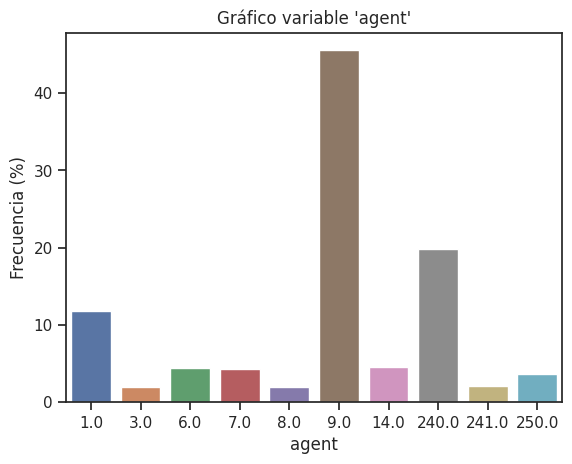

In [286]:
sns.barplot(x=cantidad_agent.index, y=porcentajes_agent).set(title="Gráfico variable 'agent'", ylabel="Frecuencia (%)", xlabel="agent")
plt.show()

## Company

Tipo de variable: cualitativa

In [287]:
hotels['company'].unique()

array([ nan, 223., 512., 218., 233., 268., 385.,  88., 154.,  51., 281.,
       202.,  67., 405.,  45., 329.,  46., 197., 137., 366., 174.,  40.,
       144., 227.,  86., 159., 477., 308.,  43., 219.,  68., 407.,  81.,
       465., 343., 466., 353., 424., 485.,  38.,  94., 153.,  72.,  20.,
        47., 286., 195., 358., 277., 355.,  12., 498., 278.,  62., 393.,
       238., 242., 143., 135., 331., 400., 342., 110., 313.,  78., 348.,
       209., 452.,  99., 250., 118., 507., 397., 321., 113., 167.,   9.,
       204., 280.,  83., 203., 333., 365., 186., 324., 169., 496.,  31.,
       382., 270.,  84., 245., 274., 215., 418., 525., 290.,  39.,  14.,
       150., 251., 292.,  91., 230., 521., 320., 334., 408., 207., 122.,
       178.,  82., 388., 360., 148., 183.,  22., 435., 420., 523., 307.,
       319.,  49., 421., 380.,  54., 221., 282.,  48., 200., 126., 216.,
       338., 379., 356., 461., 543., 220., 371., 105., 311., 346., 269.,
       168., 372., 399., 120.,  37., 115., 291., 12

In [288]:
top_10_companies = hotels['company'].value_counts().head(10)
hotels_top_10_companies = hotels[hotels['company'].isin(top_10_companies.index)]
cantidad_company = hotels_top_10_companies.groupby('company').size()
porcentajes_company = round((cantidad_company / cantidad_company.sum() * 100), 2)
cantidad_company = cantidad_company.sort_values(ascending=False)
porcentajes_company = porcentajes_company.sort_values(ascending=False)

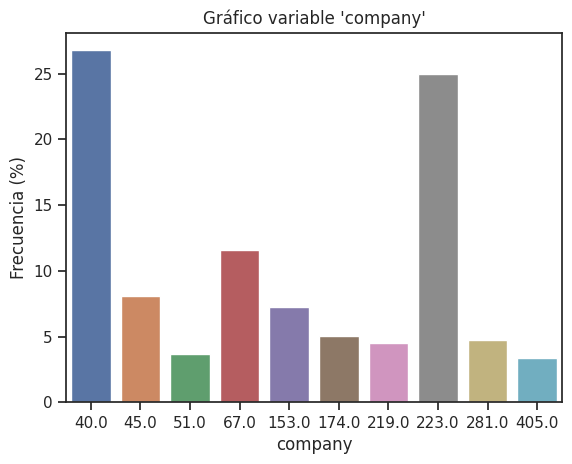

In [289]:
sns.barplot(x=cantidad_company.index, y=porcentajes_company).set(title="Gráfico variable 'company'", ylabel="Frecuencia (%)", xlabel="company")
plt.show()

## Days in Waiting List
Tipo de variable: cuantitativa

In [290]:
hotels['days_in_waiting_list'].describe()

count    61913.000000
mean         2.638977
std         18.619092
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        391.000000
Name: days_in_waiting_list, dtype: float64

[Text(0.5, 1.0, "Gráfico de variable 'days_in_waiting_list'"),
 Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Días de espera')]

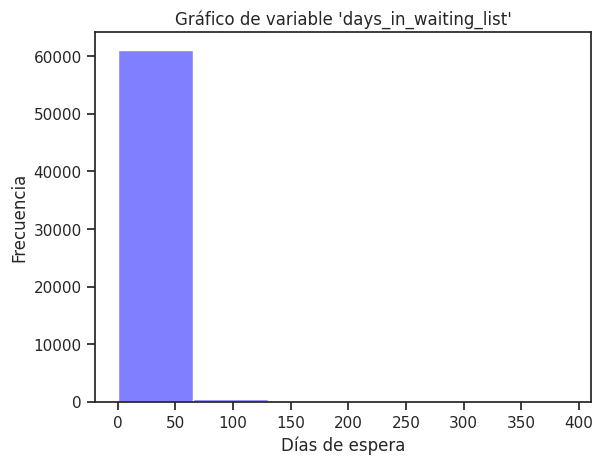

In [291]:
sns.histplot(data=hotels['days_in_waiting_list'], bins=6, alpha=0.5, color = 'blue').set(title="Gráfico de variable 'days_in_waiting_list'", ylabel="Frecuencia", xlabel="Días de espera")

## Customer type
Tipo de variable: cualitativa

In [292]:
hotels['customer_type'].unique()

array(['Transient', 'Transient-Party', 'Contract', 'Group'], dtype=object)

In [293]:
cantidad_customer_type = hotels.groupby('customer_type').size().sort_values(ascending=False)
porcentajes_customer_type = round((cantidad_customer_type / cantidad_customer_type.sum() * 100), 2).sort_values(ascending = False)
porcentajes_customer_type

customer_type
Transient          76.64
Transient-Party    19.65
Contract            3.28
Group               0.42
dtype: float64

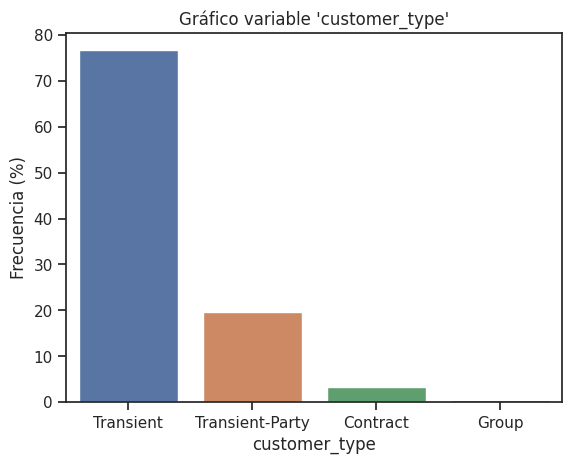

In [294]:
sns.barplot(x=cantidad_customer_type.index, y=porcentajes_customer_type).set(title="Gráfico variable 'customer_type'", ylabel="Frecuencia (%)", xlabel="customer_type")
plt.show()

La mayoría tiene una reserva no asociada a un grupo o contrato

## ADR
Tipo de variable: cuantitativa

In [295]:
hotels['adr'].describe()

count    61913.000000
mean       102.383773
std         47.757640
min         -6.380000
25%         70.000000
50%         95.000000
75%        126.000000
max        510.000000
Name: adr, dtype: float64

[Text(0.5, 1.0, "Gráfico de variable 'adr'"),
 Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'ADR')]

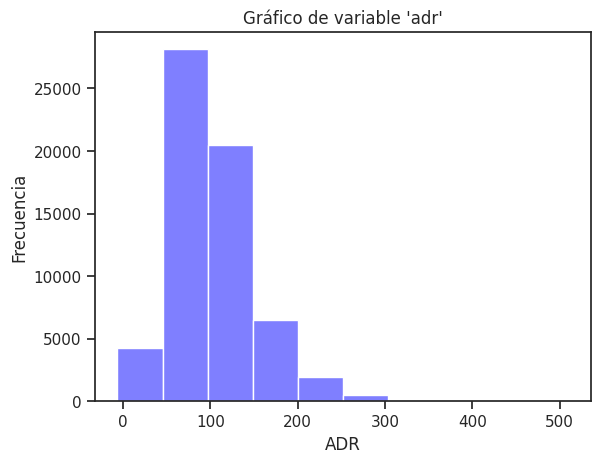

In [296]:
sns.histplot(data=hotels['adr'], bins=10, alpha=0.5, color = 'blue').set(title="Gráfico de variable 'adr'", ylabel="Frecuencia", xlabel="ADR")

## Required Car Parking Spaces
Tipo de variable: cuantitativas

In [297]:
hotels['required_car_parking_spaces'].describe()

count    61913.000000
mean         0.049957
std          0.221023
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: required_car_parking_spaces, dtype: float64

[Text(0.5, 1.0, "Gráfico de variable 'required_car_parking_spaces'"),
 Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'required_car_parking_spaces')]

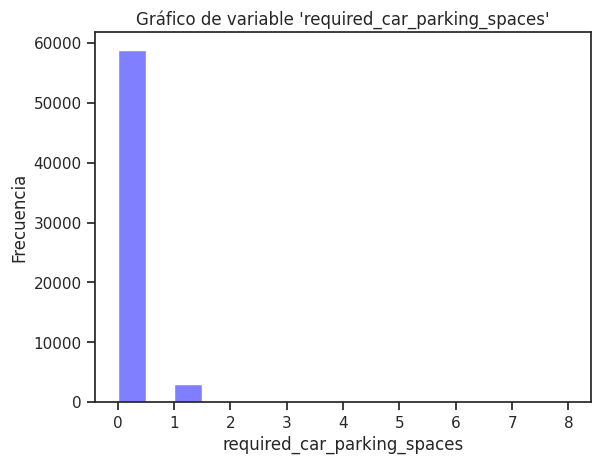

In [298]:
sns.histplot(data=hotels['required_car_parking_spaces'], bins=16, alpha=0.5, color = 'blue').set(title="Gráfico de variable 'required_car_parking_spaces'", ylabel="Frecuencia", xlabel="required_car_parking_spaces")

La mayoría no requiere espacio de estacionamiento

## Total of special requests
Tipo de variable: cuantitativa

In [299]:
hotels['total_of_special_requests'].describe()

count    61913.000000
mean         0.523703
std          0.775412
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: total_of_special_requests, dtype: float64

[Text(0.5, 1.0, "Gráfico de variable 'total_of_special_requests'"),
 Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'total_of_special_requests')]

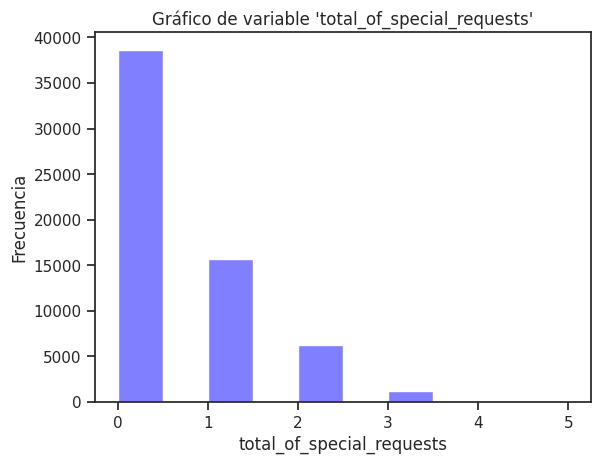

In [300]:
sns.histplot(data=hotels['total_of_special_requests'], bins=10, alpha=0.5, color = 'blue').set(title="Gráfico de variable 'total_of_special_requests'", ylabel="Frecuencia", xlabel="total_of_special_requests")

## ID
Tipo de variable: cualitativa

In [301]:
hotels['id'].unique()

array(['7aa4cc6b-b92c-4061-b21d-4f9e0cac4689',
       'b1428f80-c56c-4ae4-91a9-6962edae08b1',
       '2226c018-ea20-4c4e-8f71-ea66aee70d7c', ...,
       '76fb0e83-59df-43ee-9c33-aec51030ed45',
       '01906859-1094-4e37-b13e-b015b594d159',
       '7137e599-4442-41fb-b147-4aba9f344e38'], dtype=object)

## Is canceled
Tipo de variable: cualitativa

In [302]:
hotels['is_canceled'].unique()

array([1, 0])

In [303]:
cantidad_is_canceled = hotels.groupby('is_canceled').size().sort_values(ascending=False)
porcentajes_is_canceled = round((cantidad_is_canceled / cantidad_is_canceled.sum() * 100), 2).sort_values(ascending=False)
porcentajes_is_canceled

is_canceled
0    50.03
1    49.97
dtype: float64

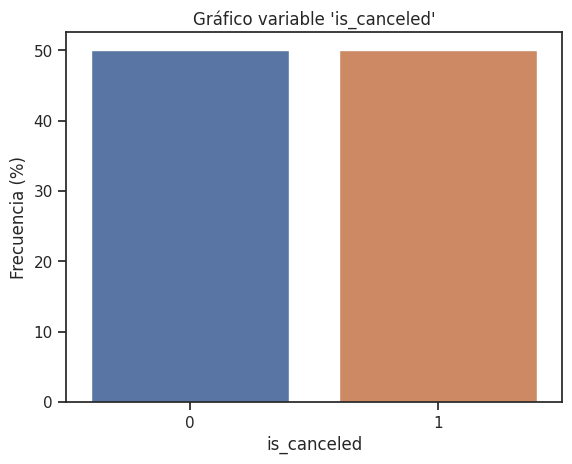

In [304]:
sns.barplot(x=cantidad_is_canceled.index, y=porcentajes_is_canceled).set(title="Gráfico variable 'is_canceled'", ylabel="Frecuencia (%)", xlabel="is_canceled")
plt.show()

Apróximadamente la mitad de los hospedados canceló su reserva mientras que la otra mitad no.

--------------------------------------------------------------------------------

## Variables irrelevantes

También nos dimos cuenta que podemos concatenar las variables arrival_date_year, arrival_date_month y arrival_date_day_of_month y unificarlo en una variable arrival_date

In [305]:
clean_hotels = hotels.copy()
clean_hotels.to_csv('df_sin_irrelevantes.csv')
clean_hotels['fecha'] = clean_hotels['arrival_date_year'].astype(str) + '-' + clean_hotels['arrival_date_month'] + '-' + clean_hotels['arrival_date_day_of_month'].astype(str)
clean_hotels['fecha']

0        2016-September-5
1         2015-October-31
2         2016-October-13
3        2016-December-12
4           2017-March-19
               ...       
61908     2017-January-27
61909    2016-September-2
61910          2017-May-8
61911     2015-October-10
61912       2016-April-17
Name: fecha, Length: 61913, dtype: object

In [306]:
clean_hotels['arrival_date'] = pd.to_datetime(clean_hotels['fecha'], dayfirst=True)
clean_hotels.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'fecha'], inplace=True)
clean_hotels

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,arrival_date
0,City Hotel,49,37,1,2,1,0.0,0,BB,USA,...,9.0,NaN,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,2016-09-05
1,Resort Hotel,4,44,0,1,2,0.0,0,BB,PRT,...,NaN,NaN,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,2015-10-31
2,City Hotel,25,42,0,1,2,2.0,0,BB,CHE,...,9.0,NaN,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,2016-10-13
3,City Hotel,26,51,2,5,2,0.0,0,BB,PRT,...,154.0,NaN,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,2016-12-12
4,City Hotel,104,12,2,5,2,0.0,0,BB,FRA,...,20.0,NaN,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0,2017-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,4,0,2,2,0.0,0,BB,ESP,...,240.0,NaN,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1,2017-01-27
61909,City Hotel,0,36,0,1,1,0.0,0,SC,FRA,...,NaN,NaN,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0,2016-09-02
61910,City Hotel,10,19,1,2,1,0.0,0,BB,FRA,...,NaN,153.0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0,2017-05-08
61911,Resort Hotel,143,41,2,5,2,0.0,0,BB,PRT,...,96.0,NaN,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1,2015-10-10


## Correlaciones

In [307]:
correlaciones_cuantitativas = clean_hotels.corr()

<ipython-input-307-deee8db1c132>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones_cuantitativas = clean_hotels.corr()


Text(0.5, 1.0, 'Mapa de calor de correlaciones')

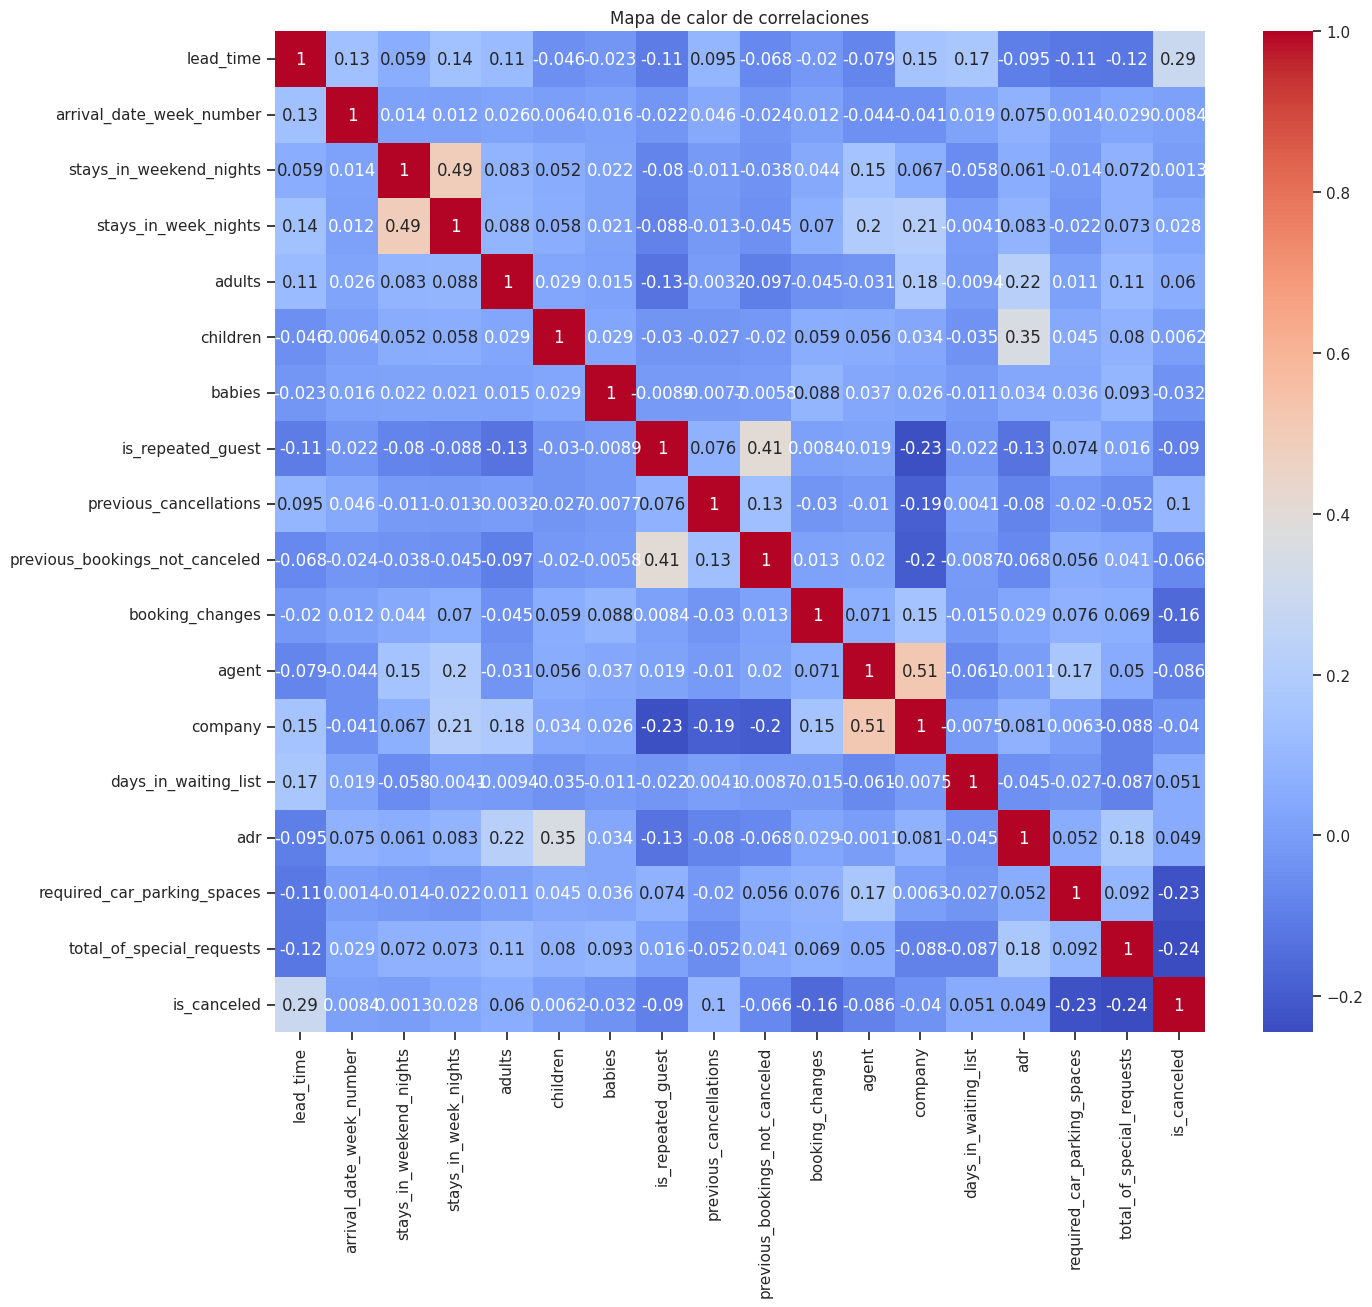

In [308]:
plt.figure(figsize=(15,13))
sns.heatmap(correlaciones_cuantitativas, annot=True, cmap= 'coolwarm')
plt.title('Mapa de calor de correlaciones')


Analizaremos las relaciones aproximadamente >0.3 y <-0.3.

A partir del mapa de calor podemos ver relacion entre:

*   stays_in_weekend_nights con stays_in_week_nights (0.49)
*   children con adr (0.35)
*   Is_repeated_guest y previous_bookings_not_cancelled (0.41)

La variable is canceled muestra mayor correlacion (positiva o negativa) con:
*   lead_time (0.29)
*   required car parking spaces (-0,23)
*   total of special requests (-0,24)





## Graficos de relacion con la variable target

### Grafico de correlacion entre is_canceled y lead_time

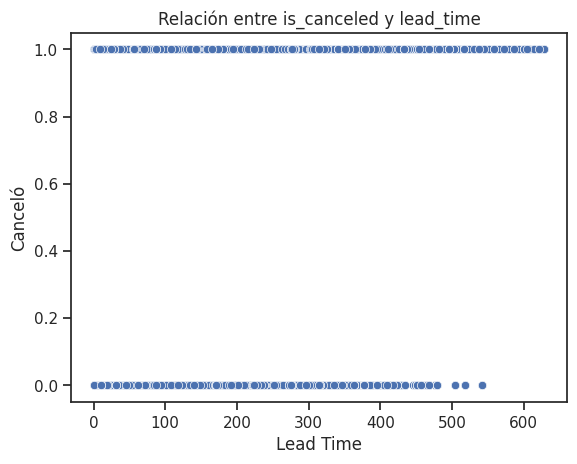

In [309]:
sns.scatterplot(x='lead_time', y='is_canceled', data=clean_hotels)
plt.title('Relación entre is_canceled y lead_time')
plt.xlabel('Lead Time')
plt.ylabel('Canceló')
plt.show()

### Grafico de correlacion entre is_canceled y required_car_parking_spaces

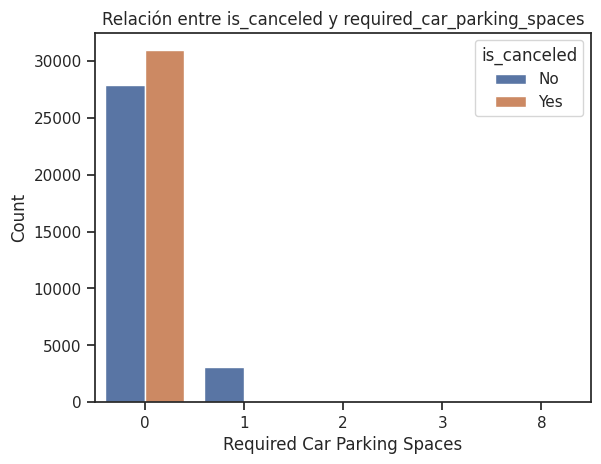

In [310]:
sns.countplot(data=clean_hotels, x='required_car_parking_spaces', hue='is_canceled')
plt.title('Relación entre is_canceled y required_car_parking_spaces')
plt.xlabel('Required Car Parking Spaces')
plt.ylabel('Count')
plt.legend(title='is_canceled', loc='upper right', labels=['No', 'Yes'])
plt.show()

Todos los que cancelaron tenian 0 parking spaces. Sin embargo, la mayoria de los que no cancelaron tambien.

### Grafico de correlacion entre is_canceled y total_special_requiers

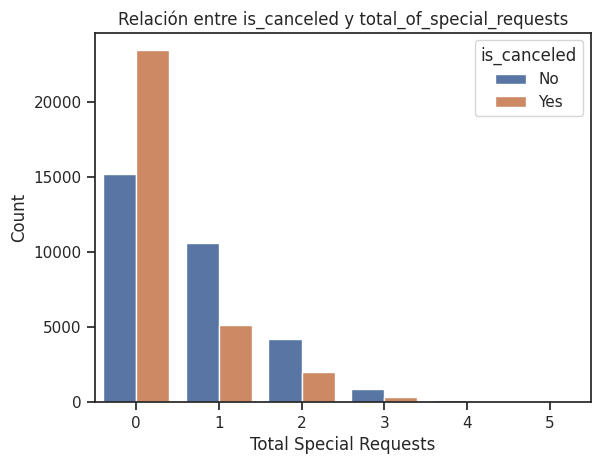

In [311]:
sns.countplot(data=clean_hotels, x='total_of_special_requests', hue='is_canceled')
plt.title('Relación entre is_canceled y total_of_special_requests')
plt.xlabel('Total Special Requests')
plt.ylabel('Count')
plt.legend(title='is_canceled', loc='upper right', labels=['No', 'Yes'])
plt.show()

A medida que hay más pedidos hay menos cancelaciones

### Grafico de correlación entre is_target y hotel

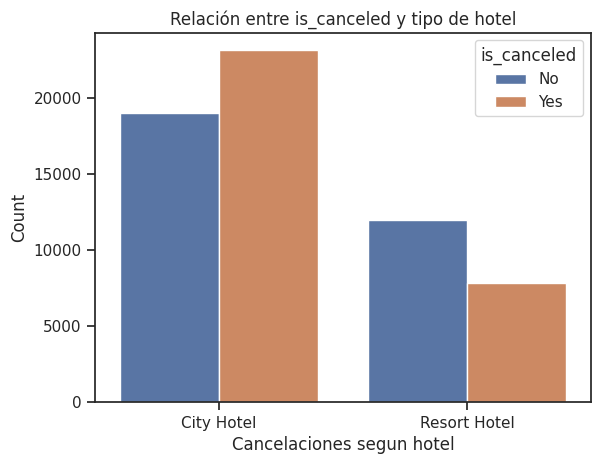

In [312]:
sns.countplot(data=clean_hotels , x='hotel', hue='is_canceled')
plt.title('Relación entre is_canceled y tipo de hotel')
plt.xlabel('Cancelaciones segun hotel')
plt.ylabel('Count')
plt.legend(title='is_canceled', loc='upper right', labels=['No', 'Yes'])
plt.show()

En City Hotel hay mas cancelaciones que no, y en Resort Hotel al reves.

### Grafico de relacion entre is_canceled y arrival_date

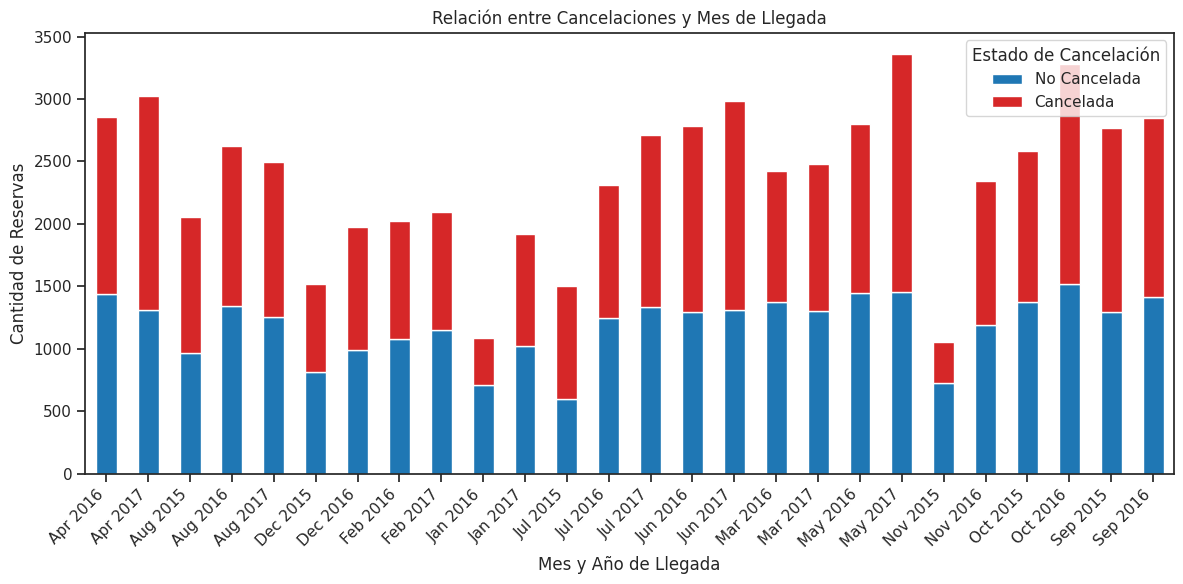

In [313]:
clean_hotels_copy = clean_hotels.copy()

clean_hotels_copy['arrival_month'] = clean_hotels_copy['arrival_date'].dt.strftime('%b %Y')

grouped_data = clean_hotels_copy.groupby(['arrival_month', 'is_canceled']).size().unstack().fillna(0)

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', '#d62728'])

plt.xlabel('Mes y Año de Llegada')
plt.ylabel('Cantidad de Reservas')
plt.title('Relación entre Cancelaciones y Mes de Llegada')
plt.xticks(rotation=45, ha='right')

plt.legend(title='Estado de Cancelación', labels=['No Cancelada', 'Cancelada'])

plt.tight_layout()
plt.show()

En varias fechas hubo más reservas canceladas que no canceladas. Por ejemplo: julio de 2015, octubre de 2016, mayo y junio de 2017.

### Correlacion entre is_canceled y meal

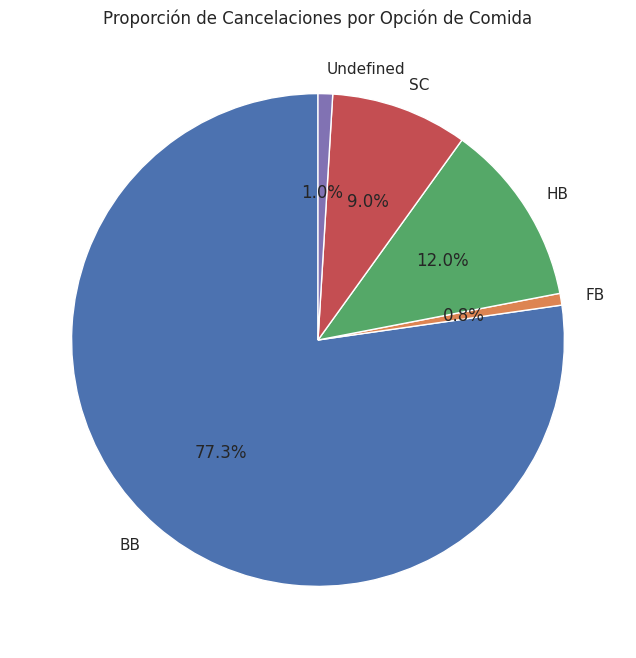

In [314]:
contingency_table = clean_hotels.groupby(['meal', 'is_canceled']).size().unstack().fillna(0)

contingency_table['Total'] = contingency_table[0] + contingency_table[1]

plt.figure(figsize=(8, 8))
plt.pie(contingency_table['Total'], labels=contingency_table.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Cancelaciones por Opción de Comida')
plt.show()

La mayoria de las cancelaciones son con la comida BB, sin embargo ya sabemos por análisis previo que esta tambien es la opcion de meal mas frecuente. Los porcentajes observados en cancelación se corresponden con los observados en el análisis de la variable meal.

### Grafico de correlacion entre is_canceled y country

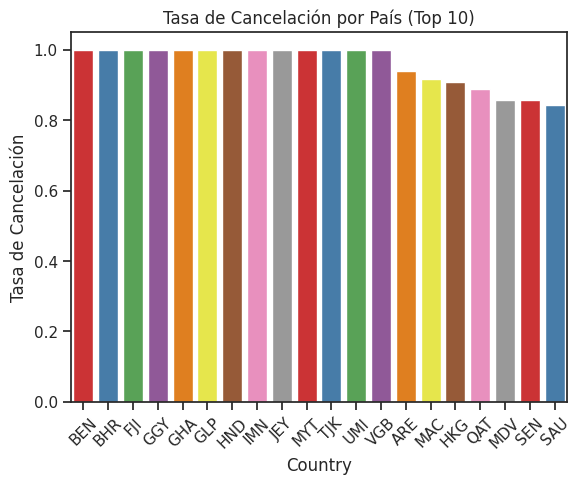

In [315]:
cancelation_rates = clean_hotels.groupby('country')['is_canceled'].mean().reset_index()

top_countries = cancelation_rates.nlargest(20, 'is_canceled')

sns.barplot(data=top_countries, x='country', y='is_canceled', palette='Set1')
plt.title('Tasa de Cancelación por País (Top 10)')
plt.xlabel('Country')
plt.ylabel('Tasa de Cancelación')
plt.xticks(rotation=45)
plt.show()

Hay paises que tienen un 100% de tasa de cancelación

### Correlacion entre is_canceled y market segment

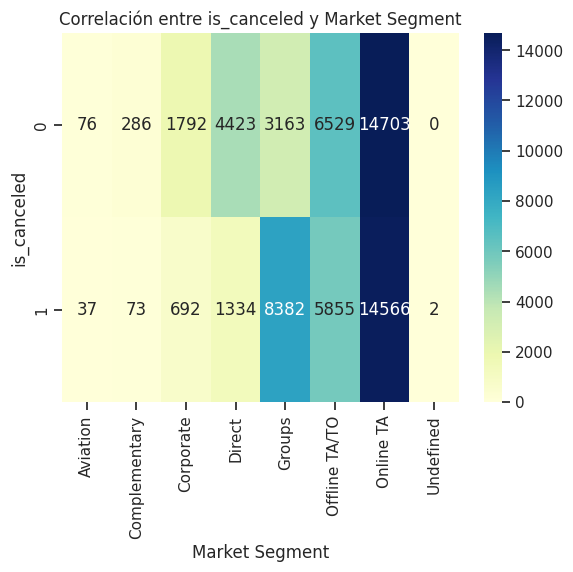

In [316]:
contingency_table = pd.crosstab(clean_hotels['is_canceled'], clean_hotels['market_segment'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Correlación entre is_canceled y Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('is_canceled')
plt.show()

Los del market segment: Groups tienen una mayor tendencia a la cancelación. En Online TA es equitativo. Y en el resto hay una mayor tendencia a no cancelar.

Las de TA/TO tienen menos proporcion de cancelaciones que el resto.

### Correlacion entre is_canceled y distribution_channel

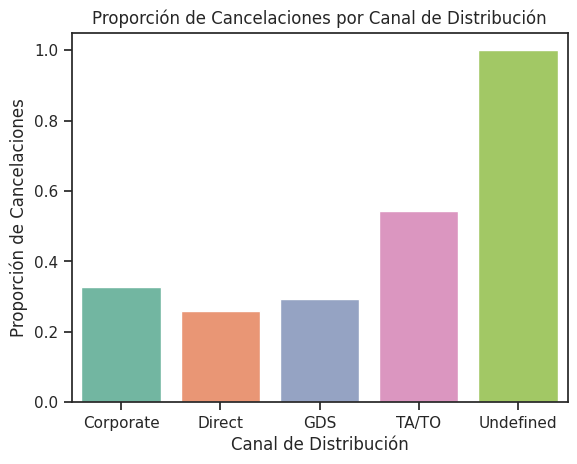

In [317]:
proporciones_cancelacion = clean_hotels.groupby('distribution_channel')['is_canceled'].mean().reset_index()

sns.barplot(x='distribution_channel', y='is_canceled', data=proporciones_cancelacion, palette='Set2')
plt.title('Proporción de Cancelaciones por Canal de Distribución')
plt.xlabel('Canal de Distribución')
plt.ylabel('Proporción de Cancelaciones')
plt.show()

La mayoria de las cancelaciones son hechas por los depositos no reembolsables

### Correlacion entre is_canceled e is_repeated_guest

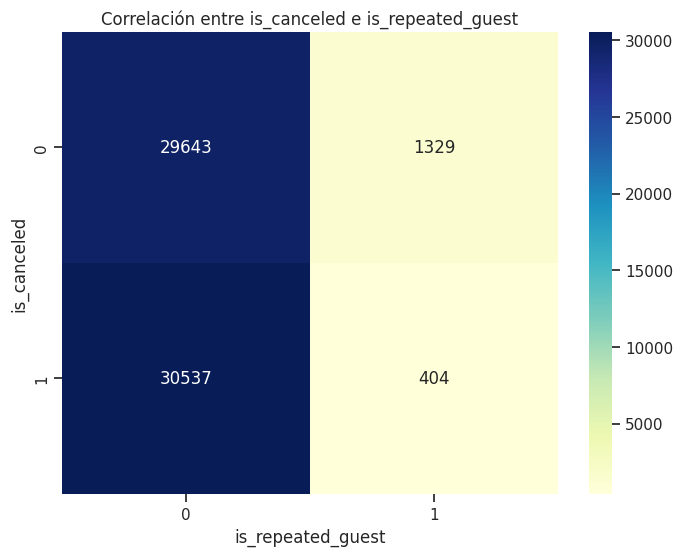

In [318]:
matriz_correlacion = pd.crosstab(clean_hotels['is_canceled'], clean_hotels['is_repeated_guest'])

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Correlación entre is_canceled e is_repeated_guest')
plt.xlabel('is_repeated_guest')
plt.ylabel('is_canceled')
plt.show()

La mayoria de los repeated guests no cancelan, en cambio en los que no repiten tiene a estar mas equitativo

### Correlacion entre is_canceled y reserved_room_type

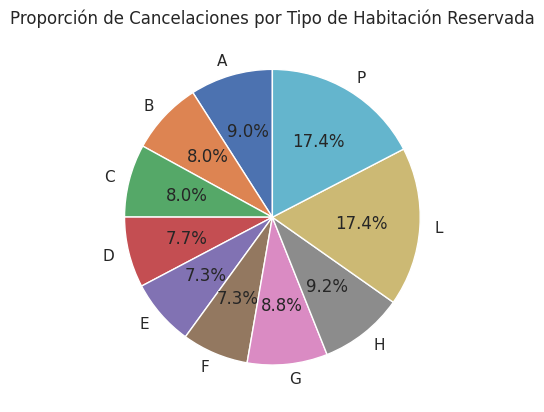

In [319]:
proporciones_cancelacion = clean_hotels.groupby('reserved_room_type')['is_canceled'].mean().reset_index()

plt.pie(proporciones_cancelacion['is_canceled'], labels=proporciones_cancelacion['reserved_room_type'], autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Cancelaciones por Tipo de Habitación Reservada')
plt.show()

Las habitaciones que mas proporcion de cancelaciones tiene son las P y L. El resto están bastante equitativas.

### Correlacion entre is_canceled y assigned_room_type

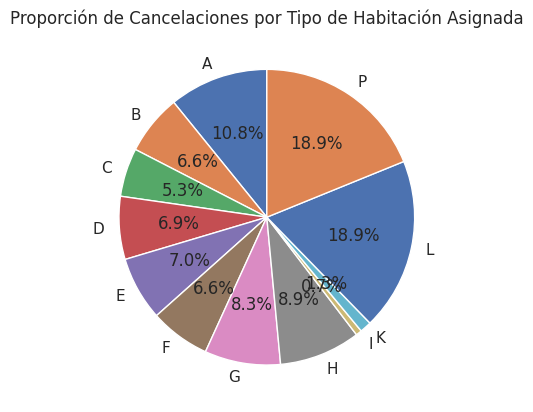

In [320]:
proporciones_cancelacion = clean_hotels.groupby('assigned_room_type')['is_canceled'].mean().reset_index()

plt.pie(proporciones_cancelacion['is_canceled'], labels=proporciones_cancelacion['assigned_room_type'], autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Cancelaciones por Tipo de Habitación Asignada')
plt.show()

### Correlacion entre is_canceled y customer_type

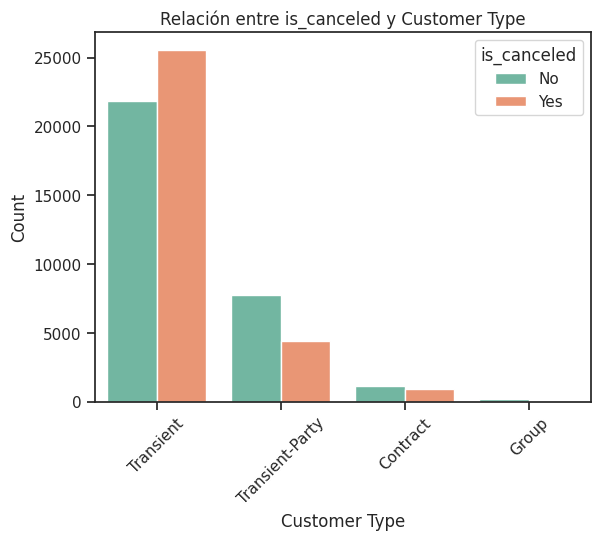

In [321]:
sns.countplot(data=clean_hotels, x='customer_type', hue='is_canceled', palette='Set2')
plt.title('Relación entre is_canceled y Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='is_canceled', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

El unico tipo de cliente que tiene mayor proporcion de cancelaciones que el resto es 'Transient'

### Grafico de correlacion entre is_canceled y agent

## Graficos de correlacion entre variables sin target

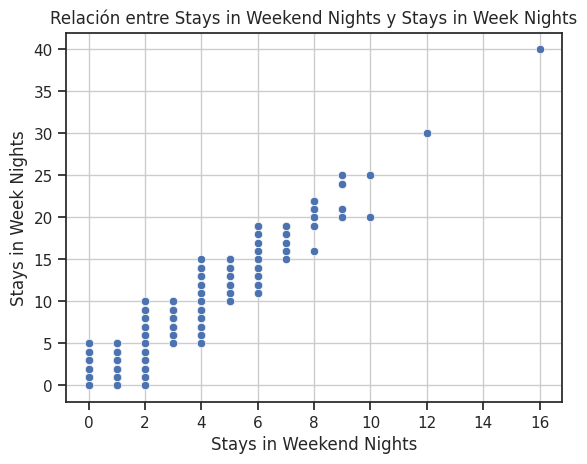

In [322]:
sns.scatterplot(x="stays_in_weekend_nights", y="stays_in_week_nights", data=clean_hotels)
plt.title('Relación entre Stays in Weekend Nights y Stays in Week Nights')
plt.xlabel('Stays in Weekend Nights')
plt.ylabel('Stays in Week Nights')
plt.grid(True)
plt.show()

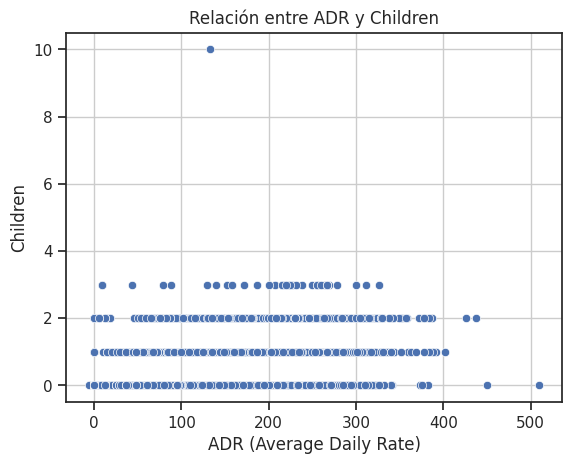

In [323]:
sns.scatterplot(x="adr", y="children", data=clean_hotels)
plt.title('Relación entre ADR y Children')
plt.xlabel('ADR (Average Daily Rate)')
plt.ylabel('Children')
plt.grid(True)
plt.show()

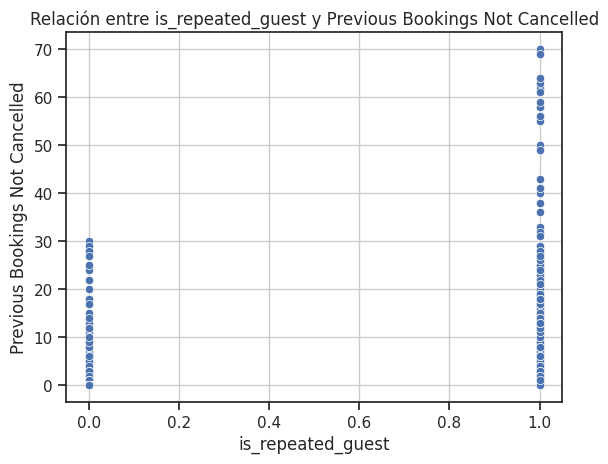

In [324]:
sns.scatterplot(x="is_repeated_guest", y="previous_bookings_not_canceled", data=clean_hotels)
plt.title('Relación entre is_repeated_guest y Previous Bookings Not Cancelled')
plt.xlabel('is_repeated_guest')
plt.ylabel('Previous Bookings Not Cancelled')
plt.grid(True)
plt.show()

Se observa mas historias de reservas previas sin cancelar en huespedes repetidos que en los no

##Datos faltantes

In [325]:
datos_faltantes = clean_hotels.isnull().sum()
porcentaje_faltantes = (datos_faltantes / len(clean_hotels)) * 100
resumen_faltantes = pd.DataFrame({'Columna': clean_hotels.columns, 'Datos Faltantes': datos_faltantes, 'Porcentaje Faltantes': porcentaje_faltantes}).sort_values(by='Datos Faltantes', ascending=False)
resumen_faltantes

,Columna,Datos Faltantes,Porcentaje Faltantes
company,company,58761,94.908985
agent,agent,7890,12.743689
country,country,221,0.356952
children,children,4,0.006461
hotel,hotel,0,0.000000
assigned_room_type,assigned_room_type,0,0.000000
is_canceled,is_canceled,0,0.000000
id,id,0,0.000000
total_of_special_requests,total_of_special_requests,0,0.000000
required_car_parking_spaces,required_car_parking_spaces,0,0.000000


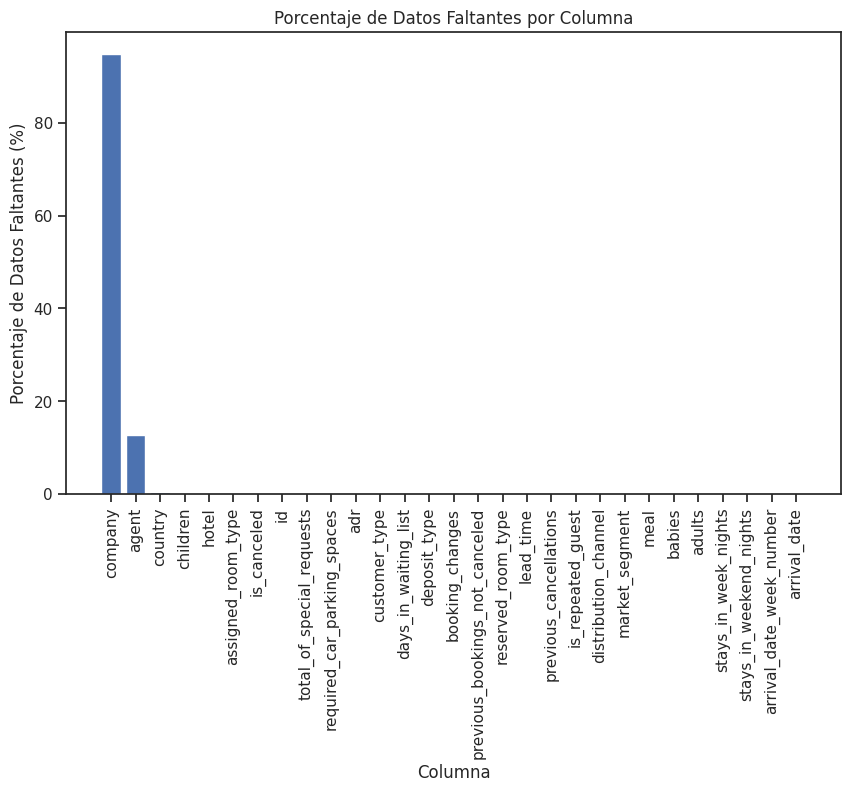

In [326]:
plt.figure(figsize=(10, 6))
plt.bar(resumen_faltantes['Columna'], resumen_faltantes['Porcentaje Faltantes'])
plt.xlabel('Columna')
plt.ylabel('Porcentaje de Datos Faltantes (%)')
plt.xticks(rotation=90)
plt.title('Porcentaje de Datos Faltantes por Columna')
plt.show()

### Análisis e imputación de agent
La columna de agente no aporta datos relevantes para predecir si una reserva será o no cancelada y por eso decidimos sacar esta columna de nuestro Dataframe.

In [327]:
clean_hotels = clean_hotels.drop(columns=['agent'])

### Análisis e imputación de company

Luego de analizar cada columna del DataFrame, podemos concluir que la gran mayoria de las reservas no tienen company. Por lo tanto, este dato no lo consideraremos relevante para su análisis ya que no presenta información importante

In [328]:
clean_hotels = clean_hotels.drop(columns=['company'])

### Análisis e imputación de country

In [329]:
df_country_original = clean_hotels['country']
df_country_original.isnull().sum()

221

Aplicamos MICE para que no haya countries con valores nulos:

In [330]:
encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(clean_hotels[['country']])

imputer = IterativeImputer()
data_imputed = (imputer.fit_transform(data_encoded))
data_encoded = data_imputed

clean_hotels['country'] = encoder.inverse_transform(data_encoded)

df_country_completo = clean_hotels['country']
df_country_completo.isnull().sum()

0

In [331]:
country_counts_original = df_country_original.value_counts()
country_counts_completo = df_country_completo.value_counts()

difference_data = {
    'País': country_counts_original.index,
    'Antes de Imputación': country_counts_original.values,
    'Después de Imputación': country_counts_completo.values,
    'Diferencia': country_counts_completo.values - country_counts_original.values
}

difference_df = pd.DataFrame(difference_data)
difference_df = difference_df.sort_values(by='Diferencia', ascending=False)

print("Diferencia entre la cantidad de cada país antes y después de la imputación (ordenado por Diferencia descendente):")
print(difference_df)

Diferencia entre la cantidad de cada país antes y después de la imputación (ordenado por Diferencia descendente):
    País  Antes de Imputación  Después de Imputación  Diferencia
25   LUX                  150                    191          41
30   JPN                   83                    106          23
21   AUS                  217                    235          18
22   AGO                  200                    217          17
29   ARG                  106                    122          16
..   ...                  ...                    ...         ...
70   CPV                   13                     13           0
69   AZE                   13                     13           0
68   LBN                   14                     14           0
64   NGA                   19                     19           0
148  RWA                    1                      1           0

[149 rows x 4 columns]


## Analisis e imputacion de variable children

Al ser muy pocos los registros que contienen nulo la columna children decidimos borrar estos ya que no modifica el análisis con respecto a la cantidad total. Luego, verificamos con .shape

In [332]:
clean_hotels_sin_faltantes = clean_hotels.copy()
clean_hotels_sin_faltantes = clean_hotels_sin_faltantes[clean_hotels_sin_faltantes['children'].notna()]
clean_hotels_sin_faltantes.to_csv('df_sin_faltantes.csv')
clean_hotels_sin_faltantes.shape

(61909, 27)

Además, observamos que children es de tipo float. Como este tipo de dato no es representativo de la variable, lo cambiamos a int.

In [333]:
clean_hotels_sin_faltantes['children'] = clean_hotels_sin_faltantes['children'].astype(int)

# Valores atípicos

Para el análisis univariado utilizaremos boxplot. Así podremos identificar valores atípicos en cada una de las variables.

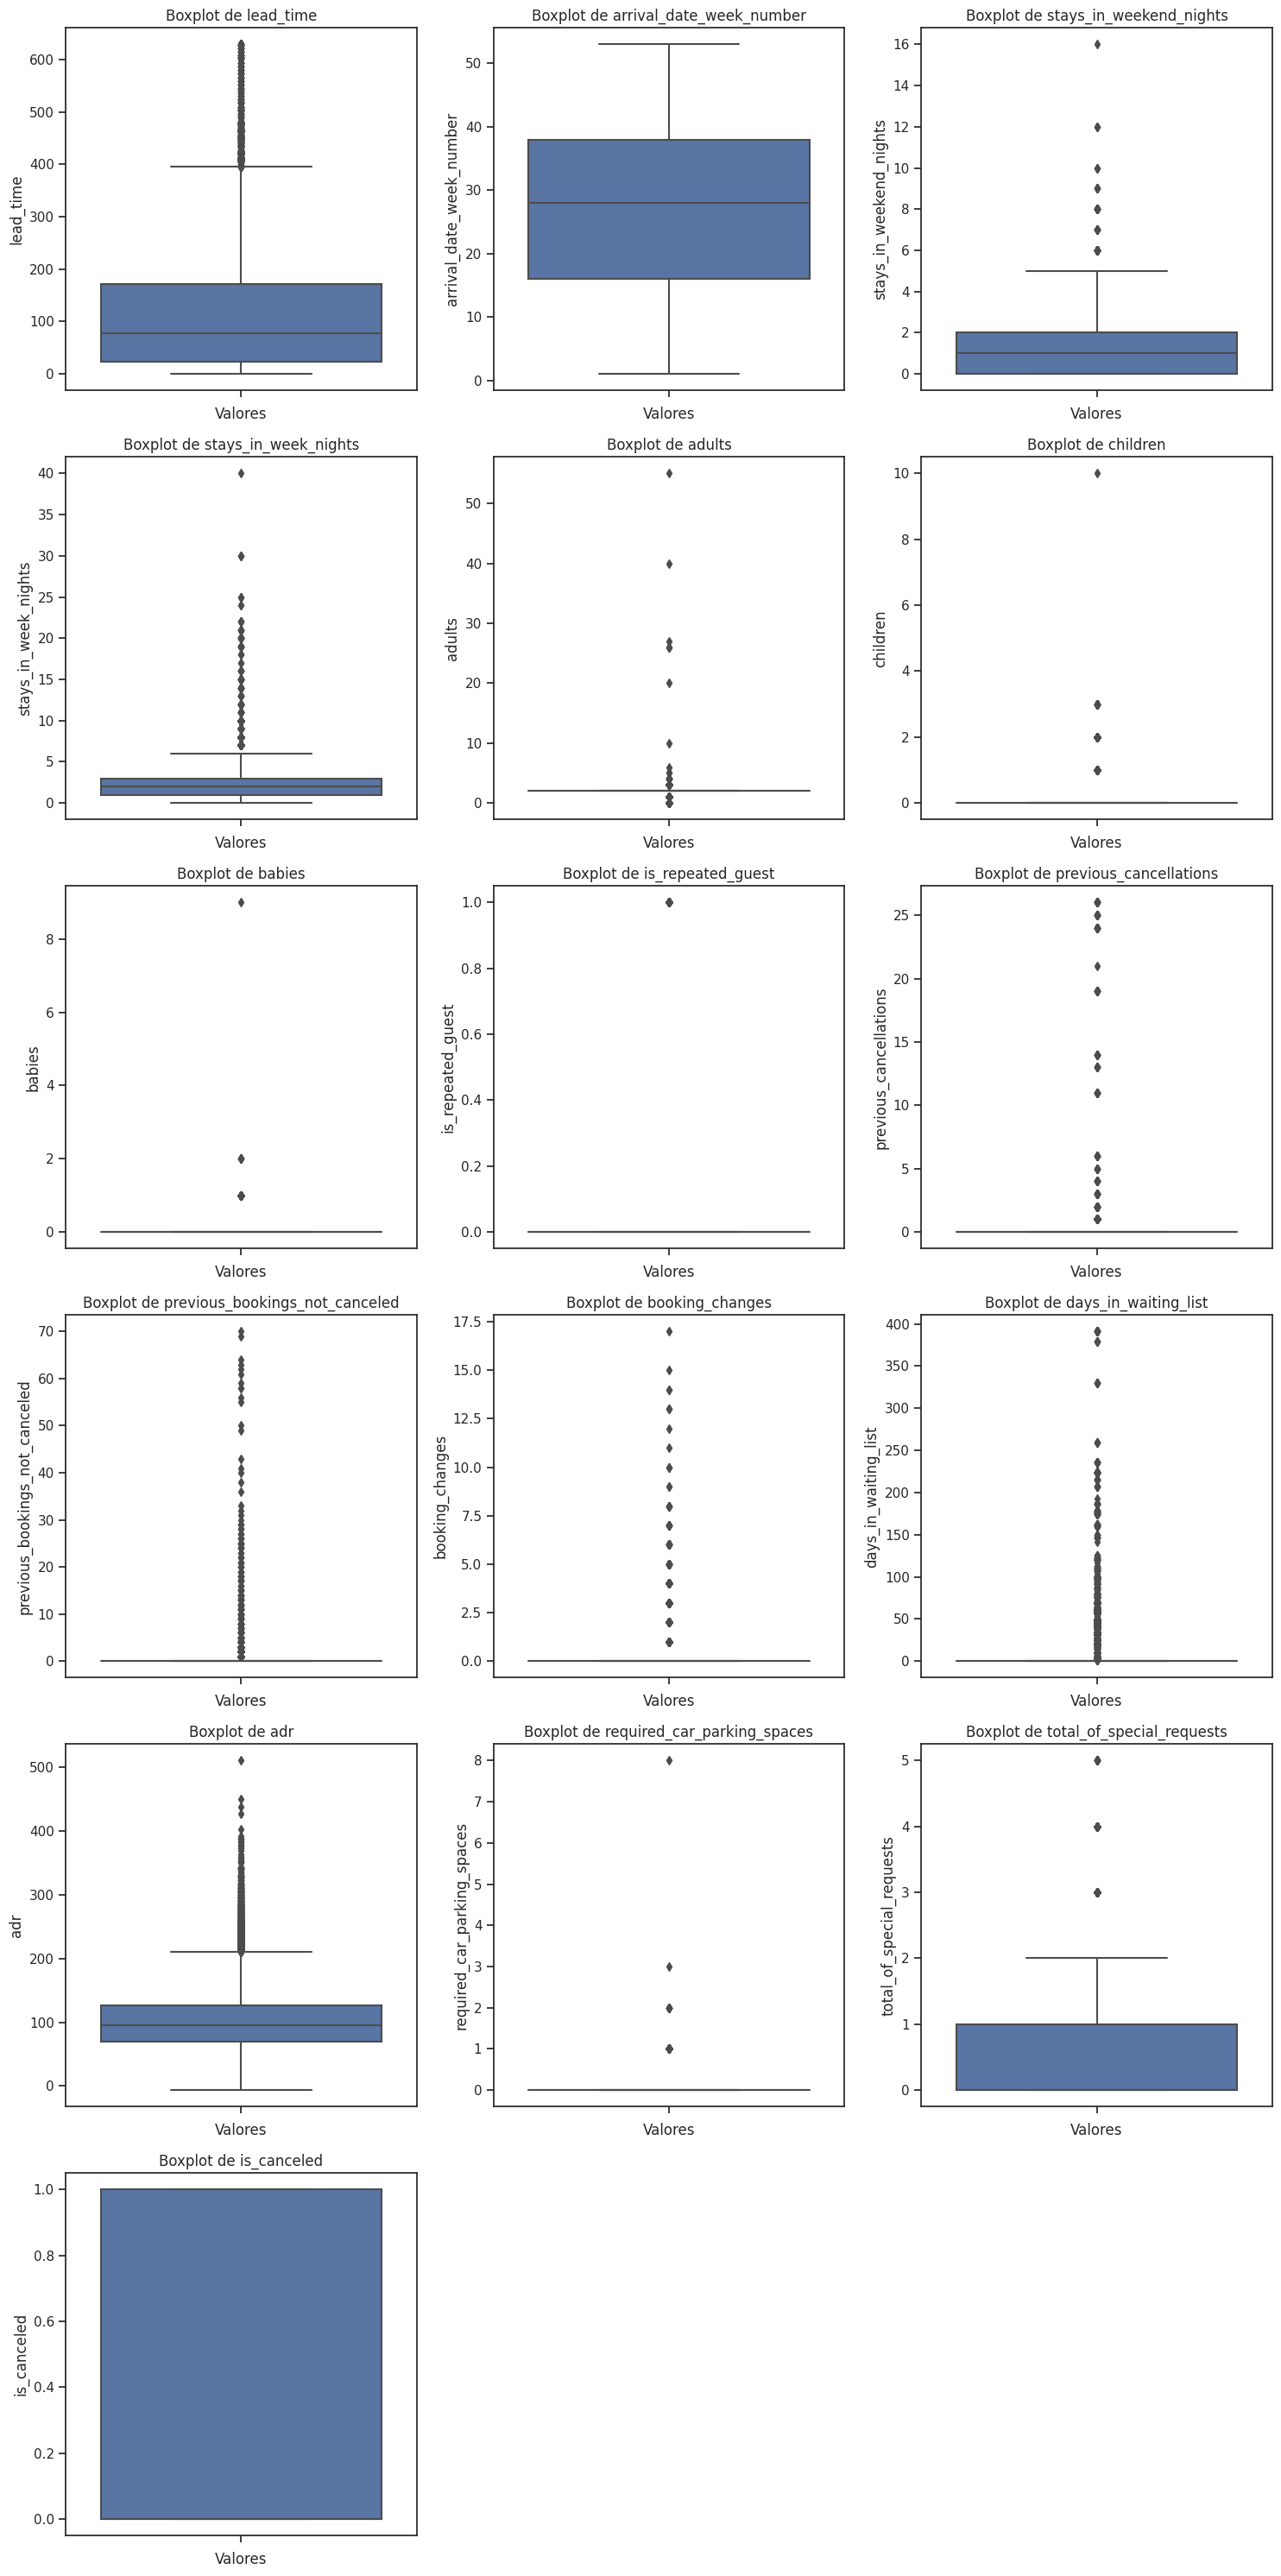

In [334]:
variables_cuantitativas_clean = clean_hotels_sin_faltantes.select_dtypes(include=['float64', 'int64'])

columnas_numericas = variables_cuantitativas_clean.select_dtypes(include=['number']).columns

columnas_por_fila = 3

num_filas = (len(columnas_numericas) - 1) // columnas_por_fila + 1

fig, axes = plt.subplots(num_filas, columnas_por_fila, figsize=(15, 5 * num_filas))

for i, columna in enumerate(columnas_numericas):
    fila = i // columnas_por_fila
    columna_actual = i % columnas_por_fila
    ax = axes[fila, columna_actual]

    sns.boxplot(y=variables_cuantitativas_clean[columna], ax=ax, orient="v")
    ax.set_ylabel(columna)
    ax.set_xlabel("Valores")
    ax.set_title(f"Boxplot de {columna}")

for i in range(len(columnas_numericas), num_filas * columnas_por_fila):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

Se observan posibles outliers en **stays in weekend nights, stays in week nights**, **total_of_special_requests**, **adults, children, babies**, **required_car_parking_spaces**

Vamos a realizar otro grafico para lead_time, previous_cancellations, booking_changes, days_in_waiting_list, previous_bookings_not_cancelled y adr para observar mejor los outliers

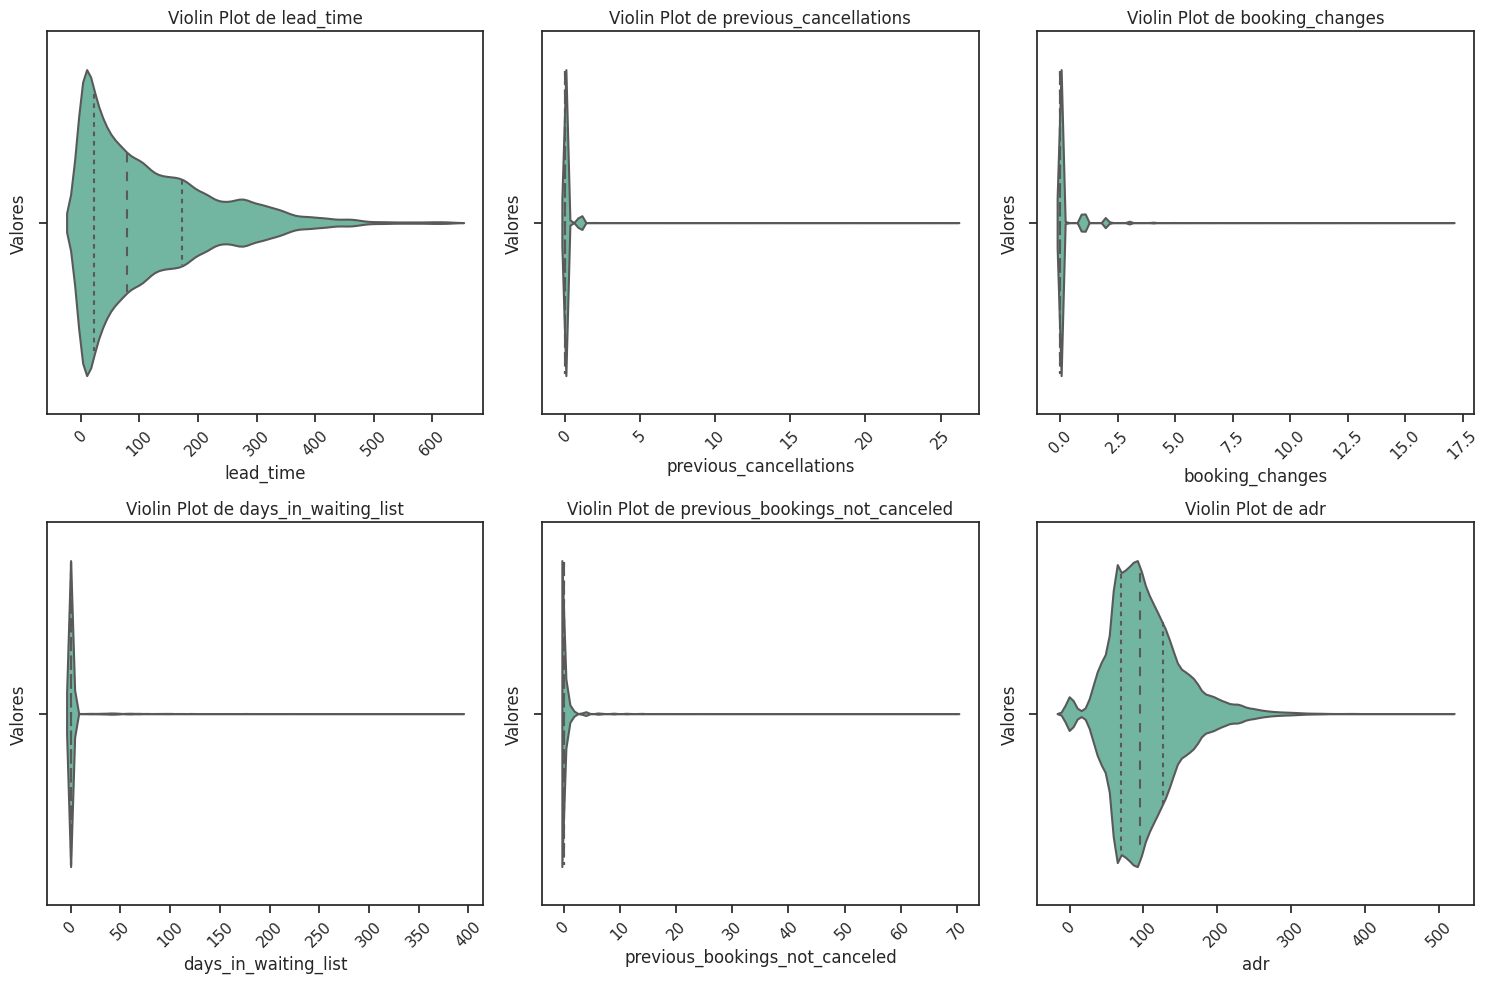

In [335]:
variables = ['lead_time', 'previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'previous_bookings_not_canceled', 'adr']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, variable in enumerate(variables):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    sns.violinplot(data=clean_hotels_sin_faltantes, x=variable, ax=ax, inner='quart', palette='Set2')
    ax.set_title(f'Violin Plot de {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Valores')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Total of special requests

In [336]:
z_scores = np.abs(st.zscore(clean_hotels_sin_faltantes['total_of_special_requests']))
umbral = 3
outliers = clean_hotels_sin_faltantes['total_of_special_requests'][z_scores > umbral]
outliers.shape[0]

1358

In [337]:
outliers.shape[0] * 100 / clean_hotels_sin_faltantes.shape[0]

2.193542134423105

Como representa el 2,19 % decidimos borrar estos registros

In [338]:
filtro_outliers = clean_hotels_sin_faltantes['total_of_special_requests'].isin(outliers)

clean_hotels_sin_outliers = clean_hotels_sin_faltantes[~filtro_outliers]
clean_hotels_sin_outliers.to_csv('df_sin_outliers.csv')
clean_hotels_sin_outliers.shape[0]

60551

### Required car parking spaces

In [339]:
z_scores = st.zscore(clean_hotels_sin_outliers['required_car_parking_spaces'])

umbral = 3
filtro_outliers = (z_scores > umbral) | (z_scores < -umbral)

outliers_required_car_parking = clean_hotels_sin_outliers[filtro_outliers]
outliers_required_car_parking.shape[0]

2938

In [340]:
outliers_required_car_parking.shape[0] * 100 / clean_hotels_sin_outliers.shape[0]

4.852108140245413

No podemos determinar si realmente son outliers y eliminarlos simplemente ya que representan casi un 5%. Por eso, luego lo analizaremos junto con la variable adults.

### ADR

Vamos a eliminar los registros donde adr sea un número negativo, lo cual no sería lógico.

In [341]:
adr_menor_cero = clean_hotels_sin_outliers[clean_hotels_sin_outliers['adr'] < 0]
adr_menor_cero.size

27

In [342]:
clean_hotels_sin_outliers = clean_hotels_sin_outliers[clean_hotels_sin_outliers['adr'] >= 0]

## Analisis multivariado

### Week nights y Weekend nights

Vamos a filtrar y eliminar casos donde week nigths y weekend nights ambos sean 0 ya que esto no sería posible.

In [343]:
clean_hotels_sin_outliers = clean_hotels_sin_outliers[(clean_hotels_sin_outliers['stays_in_week_nights'] != 0) | (clean_hotels_sin_outliers['stays_in_weekend_nights'] != 0)]

### Adults y Minors

Vamos a juntar children y babies en una variable 'minors' para poder analizarla junto con adults

In [344]:
clean_hotels_sin_outliers['minors'] = clean_hotels_sin_outliers['children'] + clean_hotels_sin_outliers['babies']

clean_hotels_sin_outliers = clean_hotels_sin_outliers.drop(columns=['children', 'babies'])

<ipython-input-344-43d3148e7efd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_hotels_sin_outliers['minors'] = clean_hotels_sin_outliers['children'] + clean_hotels_sin_outliers['babies']


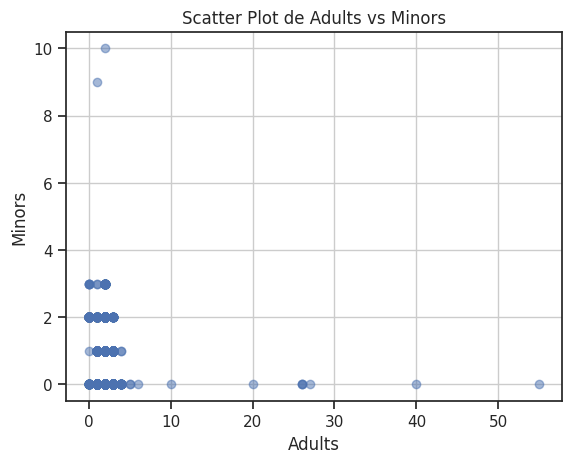

In [345]:
plt.scatter(clean_hotels_sin_outliers['adults'], clean_hotels_sin_outliers['minors'], alpha=0.5)
plt.xlabel('Adults')
plt.ylabel('Minors')
plt.title('Scatter Plot de Adults vs Minors')
plt.grid(True)
plt.show()

Deducimos lógicamente que no puede haber reservas de hotel que incuyan al menos un menor de edad y ningún adulto, ni tampoco cero y cero. Como se puede ver en el gráfico de dispersión, hay registros que incluye este tipo de valor atípico. Por lo tanto, procedemos a quitarlos del dataset.

In [346]:
clean_hotels_sin_outliers = clean_hotels_sin_outliers.drop(clean_hotels_sin_outliers[(clean_hotels_sin_outliers['minors'] >= 0) & (clean_hotels_sin_outliers['adults'] == 0)].index)

Ademas podemos observar en el grafico que hay reservas con mucha cantidad de adultos. Analizaremos estos datos relacionandolos con la variable customer type

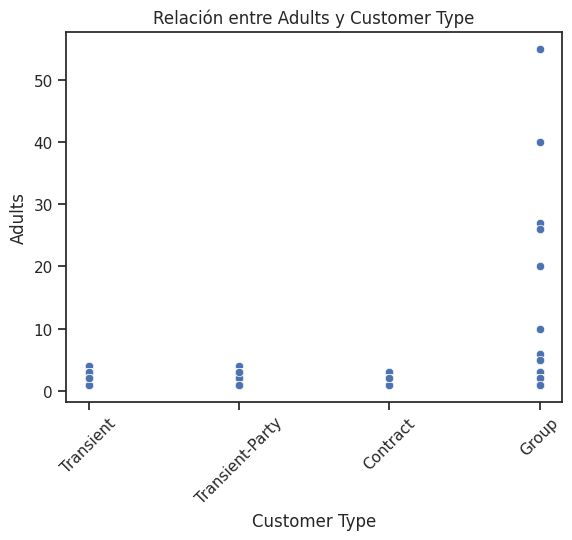

In [347]:
sns.scatterplot(data=clean_hotels_sin_outliers, x='customer_type', y='adults')

plt.title('Relación entre Adults y Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Adults')
plt.xticks(rotation=45)
plt.show()

Observamos que aquellos registros donde la cantidad de adultos es alta son casos de grupos. Por lo tanto no los consideraremos outliers y no los eliminaremos

### Adults y Required car parking spaces

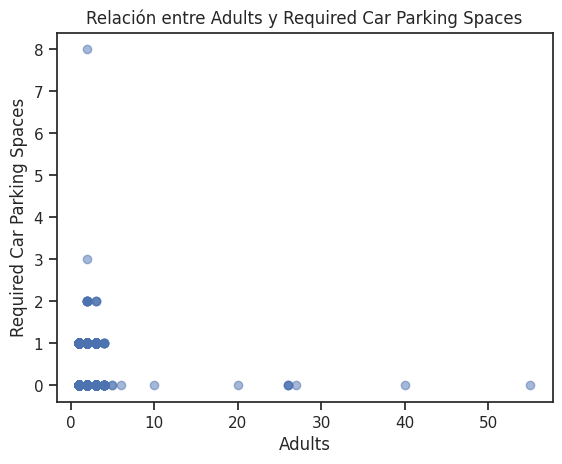

In [348]:
plt.scatter(clean_hotels_sin_outliers['adults'], clean_hotels_sin_outliers['required_car_parking_spaces'], alpha=0.5)

plt.title('Relación entre Adults y Required Car Parking Spaces')
plt.xlabel('Adults')
plt.ylabel('Required Car Parking Spaces')
plt.show()

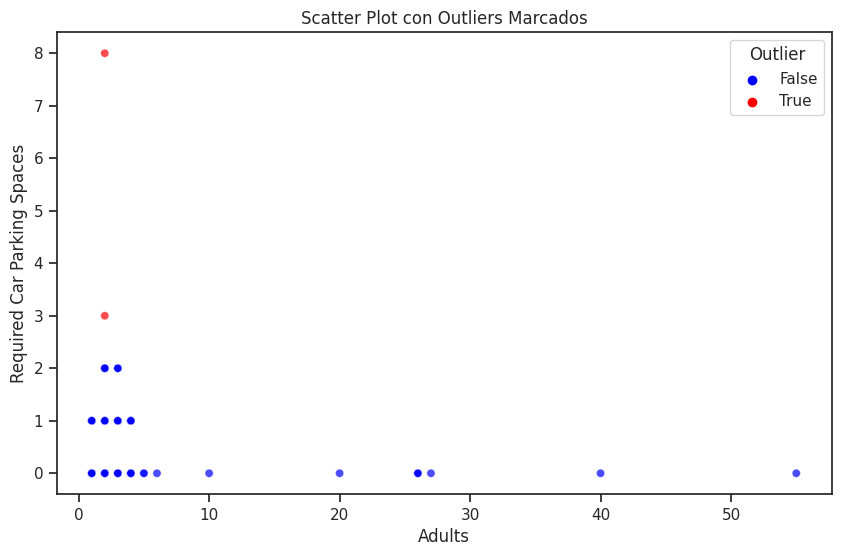

In [349]:
z_scores = np.abs((clean_hotels_sin_outliers['required_car_parking_spaces'] - clean_hotels_sin_outliers['required_car_parking_spaces'].mean()) / clean_hotels_sin_outliers['required_car_parking_spaces'].std())

umbral = 10

clean_hotels_sin_outliers['is_outlier'] = z_scores > umbral

plt.figure(figsize=(10, 6))
sns.scatterplot(x='adults', y='required_car_parking_spaces', data=clean_hotels_sin_outliers, hue='is_outlier', palette={True: 'red', False: 'blue'}, alpha=0.7)
plt.title('Scatter Plot con Outliers Marcados')
plt.xlabel('Adults')
plt.ylabel('Required Car Parking Spaces')
plt.legend(title='Outlier')
plt.show()


In [350]:
outliers = clean_hotels_sin_outliers[clean_hotels_sin_outliers['is_outlier']]
outliers

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,arrival_date,minors,is_outlier
8269,Resort Hotel,138,12,2,2,2,HB,AUT,Direct,Corporate,...,122,Transient-Party,80.0,8,0,174365a6-2548-48c4-ae12-7842d5498f12,0,2017-03-19,0,True
13713,Resort Hotel,205,26,3,10,2,BB,PRT,Direct,Direct,...,0,Transient,111.0,3,0,4267af65-0a89-4489-b099-e0332c6c51fe,0,2017-06-26,0,True


Estos dos registros donde son 2 adultos y uno pide 3 espacios de estacionamiento y el otro 8, los consideramos outliers y los eliminamos de nuestro dataframe.

In [351]:
clean_hotels_sin_outliers = clean_hotels_sin_outliers[~clean_hotels_sin_outliers['is_outlier']]


y borramos la columna 'is_outlier' que ya no la necesitamos

In [352]:
clean_hotels_sin_outliers.drop(columns=['is_outlier'], inplace=True)

<ipython-input-352-19e22276e434>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_hotels_sin_outliers.drop(columns=['is_outlier'], inplace=True)


### Stays in week nights y stays in weekend nights

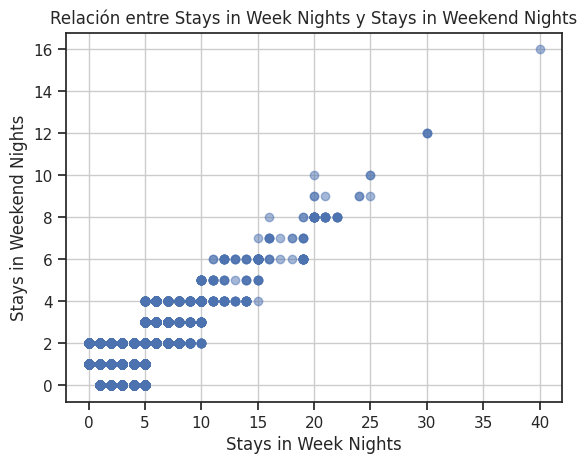

In [353]:
plt.scatter(clean_hotels_sin_outliers['stays_in_week_nights'], clean_hotels_sin_outliers['stays_in_weekend_nights'], alpha=0.5)
plt.title('Relación entre Stays in Week Nights y Stays in Weekend Nights')
plt.xlabel('Stays in Week Nights')
plt.ylabel('Stays in Weekend Nights')
plt.grid(True)
plt.show()

Calculamos los outliers multivariados usando la distancia Mahalanobis, ajustando el umbral, y los quitamos del dataset.

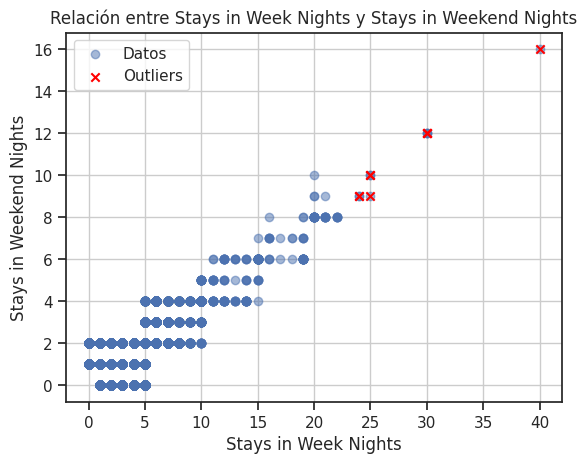

In [354]:
distancia_mahalanobis = calculate_mahalanobis_distance(clean_hotels_sin_outliers, 'stays_in_week_nights', 'stays_in_weekend_nights')

umbral = 25 * np.std(distancia_mahalanobis['mahalanobis'])

outliers = distancia_mahalanobis[distancia_mahalanobis['mahalanobis'] > umbral]

plt.scatter(distancia_mahalanobis['stays_in_week_nights'], distancia_mahalanobis['stays_in_weekend_nights'], alpha=0.5, label='Datos')
plt.scatter(outliers['stays_in_week_nights'], outliers['stays_in_weekend_nights'], color='red', marker='x', label='Outliers')
plt.title('Relación entre Stays in Week Nights y Stays in Weekend Nights')
plt.xlabel('Stays in Week Nights')
plt.ylabel('Stays in Weekend Nights')
plt.legend()
plt.grid(True)
plt.show()

In [355]:
clean_hotels_sin_outliers = clean_hotels_sin_outliers[~clean_hotels_sin_outliers.index.isin(outliers.index)]

In [358]:
df_final_chp1 = clean_hotels_sin_outliers.copy()
df_final_chp1.to_csv('df_final_chp1.csv')